In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import csv
from spisea import synthetic, ifmr, evolution
from spisea.imf import imf
from popsycle import ebf
from popsycle import synthetic as pop_synthetic

plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['xtick.labelsize'] = 28
plt.rcParams['ytick.labelsize'] = 28
plt.rcParams['legend.fontsize'] = 18

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))


In [2]:
# paths to the various refine events fits files OGLE EWS style (I-band)
#Spera15
S_527 = '/u/samrose/scratch/metal_ifmr_runs/OGLE527ub_v3/OGLE527ub_v3_Spera_refined_events_ubv_I_Damineli16.fits'
S_611 = '/u/samrose/scratch/metal_ifmr_runs/OGLE611ub_v3/OGLE611ub_v3_Spera_refined_events_ubv_I_Damineli16.fits'
S_629 = '/u/samrose/scratch/metal_ifmr_runs/OGLE629ub_v3/OGLE629ub_v3_Spera_refined_events_ubv_I_Damineli16.fits'
S_500 = '/u/samrose/scratch/metal_ifmr_runs/OGLE500ub_v3/OGLE500ub_v3_Spera_refined_events_ubv_I_Damineli16.fits'
S_506 = '/u/samrose/scratch/metal_ifmr_runs/OGLE506ub_v3/OGLE506ub_v3_Spera_refined_events_ubv_I_Damineli16.fits'
S_675 = '/u/samrose/scratch/metal_ifmr_runs/OGLE675ub_v3/OGLE675ub_v3_Spera_refined_events_ubv_I_Damineli16.fits'
S_504 = '/u/samrose/scratch/NERSC_runs/l2.150_b-1.770/seed42_spera15_refined_events_ubv_I_Damineli16.fits'
S_511 = '/u/samrose/scratch/NERSC_runs/l3.280_b-2.520/seed42_spera15_refined_events_ubv_I_Damineli16.fits'
S_648 = '/u/samrose/scratch/NERSC_runs/l1.960_b0.940/seed42_spera15_refined_events_ubv_I_Damineli16.fits'
#Raithel18
R_527 = '/u/samrose/scratch/metal_ifmr_runs/OGLE527ub_v3/OGLE527ub_v3_my_Raithel_refined_events_ubv_I_Damineli16.fits'
R_611 = '/u/samrose/scratch/metal_ifmr_runs/OGLE611ub_v3/my_Raithel611/OGLE611ub_v3_my_Raithel_refined_events_ubv_I_Damineli16.fits'
R_629 = '/u/samrose/scratch/metal_ifmr_runs/OGLE629ub_v3/OGLE629ub_v3_my_Raithel_refined_events_ubv_I_Damineli16.fits'
R_500 = '/u/samrose/scratch/metal_ifmr_runs/OGLE500ub_v3/OGLE500ub_v3_Raithel_refined_events_ubv_I_Damineli16.fits'
R_506 = '/u/samrose/scratch/metal_ifmr_runs/OGLE506ub_v3/OGLE506ub_v3_Raithel_refined_events_ubv_I_Damineli16.fits'
R_675 = '/u/samrose/scratch/metal_ifmr_runs/OGLE675ub_v3/OGLE675ub_v3_Raithel_refined_events_ubv_I_Damineli16.fits'
R_504 = '/u/samrose/scratch/NERSC_runs/l2.150_b-1.770/seed42_raithel18_refined_events_ubv_I_Damineli16.fits'
R_511 = '/u/samrose/scratch/NERSC_runs/l3.280_b-2.520/seed42_raithel18_refined_events_ubv_I_Damineli16.fits'
R_648 = '/u/samrose/scratch/NERSC_runs/l1.960_b0.940/seed42_raithel18_refined_events_ubv_I_Damineli16.fits'
#N20
N_500 = '/u/samrose/scratch/metal_ifmr_runs/OGLE500ub_v3/OGLE500ub_v3_N20_refined_events_ubv_I_Damineli16.fits'
N_506 = '/u/samrose/scratch/metal_ifmr_runs/OGLE506ub_v3/OGLE506ub_v3_N20_refined_events_ubv_I_Damineli16.fits'
N_527 = '/u/samrose/scratch/metal_ifmr_runs/OGLE527ub_v3/OGLE527ub_v3_N20_refined_events_ubv_I_Damineli16.fits'
N_611 = '/u/samrose/scratch/metal_ifmr_runs/OGLE611ub_v3/OGLE611ub_v3_N20_refined_events_ubv_I_Damineli16.fits'
N_629 = '/u/samrose/scratch/metal_ifmr_runs/OGLE629ub_v3/OGLE629ub_v3_N20_refined_events_ubv_I_Damineli16.fits'
N_675 = '/u/samrose/scratch/metal_ifmr_runs/OGLE675ub_v3/OGLE675ub_v3_N20_refined_events_ubv_I_Damineli16.fits'
N_504 = '/u/samrose/scratch/NERSC_runs/l2.150_b-1.770/seed42_N20_refined_events_ubv_I_Damineli16.fits'
N_511 = '/u/samrose/scratch/NERSC_runs/l3.280_b-2.520/seed42_N20_refined_events_ubv_I_Damineli16.fits'
N_648 = '/u/samrose/scratch/NERSC_runs/l1.960_b0.940/seed42_N20_refined_events_ubv_I_Damineli16.fits'

In [3]:
# paths to the various refine events fits files Roman style (H-band)
#Spera15
Ro_S_675 = '/u/samrose/scratch/metal_ifmr_runs/OGLE675ub_v3/OGLE675ub_v3_Spera_Roman_refined_events_ubv_H_Damineli16.fits'
Ro_S_506 = '/u/samrose/scratch/metal_ifmr_runs/OGLE506ub_v3/OGLE506ub_v3_Spera_Roman_refined_events_ubv_H_Damineli16.fits'
Ro_S_500 = '/u/samrose/scratch/metal_ifmr_runs/OGLE500ub_v3/OGLE500ub_v3_Spera_Roman_refined_events_ubv_H_Damineli16.fits'
#Raithel18
Ro_R_675 = '/u/samrose/scratch/metal_ifmr_runs/OGLE675ub_v3/OGLE675ub_v3_Raithel_Roman_refined_events_ubv_H_Damineli16.fits'
Ro_R_506 = '/u/samrose/scratch/metal_ifmr_runs/OGLE506ub_v3/OGLE506ub_v3_Raithel_Roman_refined_events_ubv_H_Damineli16.fits'
Ro_R_500 = '/u/samrose/scratch/metal_ifmr_runs/OGLE500ub_v3/OGLE500ub_v3_Raithel_Roman_refined_events_ubv_H_Damineli16.fits'
#SukhboldN20
Ro_N_675 = '/u/samrose/scratch/metal_ifmr_runs/OGLE675ub_v3/OGLE675ub_v3_N20_Roman_refined_events_ubv_H_Damineli16.fits'
Ro_N_506 = '/u/samrose/scratch/metal_ifmr_runs/OGLE506ub_v3/OGLE506ub_v3_N20_Roman_refined_events_ubv_H_Damineli16.fits'
Ro_N_500 = '/u/samrose/scratch/metal_ifmr_runs/OGLE500ub_v3/OGLE500ub_v3_N20_Roman_refined_events_ubv_H_Damineli16.fits'

In [4]:
#general parameters
mock_obs_time = 1000 #days
mock_area = 0.34 #square degrees, area of one mock field
OGLE_area = 1.4 #sqaure degrees, area of one OGLE field

#EWS cuts
min_mag_OGLE_I = 21 #for EWS, FOR BASELINE
min_delta_mag_OGLE = 0.1 #for EWS
max_impact_OGLE = 2 #for EWS

#Mroz 19 cuts https://iopscience.iop.org/article/10.3847/1538-4365/ab426b/pdf
min_mag_OGLE_I_19 = 21 #for Mroz 19, FOR SOURCE
max_impact_OGLE_19 = 1 #for Mroz 19
min_tE_OGLE_19 = 0.5 #days
max_tE_OGLE_19 = 300 #days


#Roman cuts
min_mag_Roman_H = 24 #for Roman
min_delta_mag_Roman = 0.1 #rough for Roman
max_impact_Roman = 2 #for Roman

In [5]:
def get_stuff(file):
    table = Table.read(file, format='fits')
    cuts_table = Table.read(file, format='fits')
    #perform magnitude cuts
    if 'ubv_I_app_S' in cuts_table.colnames:
        bad_m_idx = np.where(cuts_table['ubv_I_app_LSN'] > min_mag_OGLE_I)[0]
        cuts_table.remove_rows([bad_m_idx])
        bad_del_idx = np.where(cuts_table['delta_m_I'] < min_delta_mag_OGLE)[0]
        cuts_table.remove_rows([bad_del_idx])
        bad_u0_idx = np.where(cuts_table['u0'] > max_impact_OGLE)[0]
        cuts_table.remove_rows([bad_u0_idx])
        
    elif 'ubv_i_app_S' in cuts_table.colnames:
        bad_m_idx = np.where(cuts_table['ubv_i_app_S'] > min_mag_OGLE_I)[0]
        cuts_table.remove_rows([bad_m_idx])
        bad_del_idx = np.where(cuts_table['delta_m_i'] < min_delta_mag_OGLE)[0]
        cuts_table.remove_rows([bad_del_idx])
        bad_u0_idx = np.where(cuts_table['u0'] > max_impact_OGLE)[0]
        cuts_table.remove_rows([bad_u0_idx])
        
    
    #identify lens object
    Star_idx = np.where(table['rem_id_L'] == 0)[0]
    WD_idx = np.where(table['rem_id_L'] == 101)[0]
    NS_idx = np.where(table['rem_id_L'] == 102)[0]
    BH_idx = np.where(table['rem_id_L'] == 103)[0]
    
    c_Star_idx = np.where(cuts_table['rem_id_L'] == 0)[0]
    c_WD_idx = np.where(cuts_table['rem_id_L'] == 101)[0]
    c_NS_idx = np.where(cuts_table['rem_id_L'] == 102)[0]
    c_BH_idx = np.where(cuts_table['rem_id_L'] == 103)[0]
    
    #extract stuff
    Star_tE = table['t_E'][Star_idx]
    Star_piE = table['pi_E'][Star_idx]
    Star_mass_L = table['mass_L'][Star_idx]
    
    c_Star_tE = cuts_table['t_E'][c_Star_idx]
    c_Star_piE = cuts_table['pi_E'][c_Star_idx]
    c_Star_mass_L = cuts_table['mass_L'][c_Star_idx]
    
    NS_tE = table['t_E'][NS_idx]
    NS_piE = table['pi_E'][NS_idx]
    NS_mass_L = table['mass_L'][NS_idx]
    
    c_NS_tE = cuts_table['t_E'][c_NS_idx]
    c_NS_piE = cuts_table['pi_E'][c_NS_idx]
    c_NS_mass_L = cuts_table['mass_L'][c_NS_idx]
    
    WD_tE = table['t_E'][WD_idx]
    WD_piE = table['pi_E'][WD_idx]
    WD_mass_L = table['mass_L'][WD_idx]
    
    c_WD_tE = cuts_table['t_E'][c_WD_idx]
    c_WD_piE = cuts_table['pi_E'][c_WD_idx]
    c_WD_mass_L = cuts_table['mass_L'][c_WD_idx]
    
    BH_tE = table['t_E'][BH_idx]
    BH_piE = table['pi_E'][BH_idx]
    BH_mass_L = table['mass_L'][BH_idx]
    
    c_BH_tE = cuts_table['t_E'][c_BH_idx]
    c_BH_piE = cuts_table['pi_E'][c_BH_idx]
    c_BH_mass_L = cuts_table['mass_L'][c_BH_idx]
    
    if 'delta_m_i' in table.colnames:
        Star_del_m = table['delta_m_i'][Star_idx]
        WD_del_m = table['delta_m_i'][WD_idx]
        NS_del_m = table['delta_m_i'][NS_idx]
        BH_del_m = table['delta_m_i'][BH_idx]
        
        c_Star_del_m = cuts_table['delta_m_i'][c_Star_idx]
        c_WD_del_m = cuts_table['delta_m_i'][c_WD_idx]
        c_NS_del_m = cuts_table['delta_m_i'][c_NS_idx]
        c_BH_del_m = cuts_table['delta_m_i'][c_BH_idx]
    
    elif 'delta_m_I' in table.colnames:
        Star_del_m = table['delta_m_I'][Star_idx]
        WD_del_m = table['delta_m_I'][WD_idx]
        NS_del_m = table['delta_m_I'][NS_idx]
        BH_del_m = table['delta_m_I'][BH_idx]
        
        c_Star_del_m = cuts_table['delta_m_I'][c_Star_idx]
        c_WD_del_m = cuts_table['delta_m_I'][c_WD_idx]
        c_NS_del_m = cuts_table['delta_m_I'][c_NS_idx]
        c_BH_del_m = cuts_table['delta_m_I'][c_BH_idx]
    #going to return 2 arrays of arrays, one for the cuts
    #table and one for the not cuts table
    # Stars, WD, NS, BH
    # mass_L, tE, piE, (and if applicalble FeH)
    if 'feh_L' in table.colnames:
        Star_feh = table['feh_L'][Star_idx]
        WD_feh = table['feh_L'][WD_idx]
        NS_feh = table['feh_L'][NS_idx]
        BH_feh = table['feh_L'][BH_idx]
        
        c_Star_feh = cuts_table['feh_L'][c_Star_idx]
        c_WD_feh = cuts_table['feh_L'][c_WD_idx]
        c_NS_feh = cuts_table['feh_L'][c_NS_idx]
        c_BH_feh = cuts_table['feh_L'][c_BH_idx]
        
        Stars = np.array([Star_mass_L, Star_tE, Star_piE, Star_feh, Star_del_m])
        WDs = np.array([WD_mass_L, WD_tE, WD_piE, WD_feh, WD_del_m])
        NSs = np.array([NS_mass_L, NS_tE, NS_piE, NS_feh, NS_del_m])
        BHs = np.array([BH_mass_L, BH_tE, BH_piE, BH_feh, BH_del_m])
    
        c_Stars = np.array([c_Star_mass_L, c_Star_tE, c_Star_piE, c_Star_feh, c_Star_del_m])
        c_WDs = np.array([c_WD_mass_L, c_WD_tE, c_WD_piE, c_WD_feh, c_WD_del_m])
        c_NSs = np.array([c_NS_mass_L, c_NS_tE, c_NS_piE, c_NS_feh, c_NS_del_m])
        c_BHs = np.array([c_BH_mass_L, c_BH_tE, c_BH_piE, c_BH_feh, c_BH_del_m])
        
        events = [Stars, WDs, NSs, BHs]
        cut_events = [c_Stars, c_WDs, c_NSs, c_BHs]
    
    
    else:
        Star_feh = np.zeros(len(Star_idx))
        WD_feh = np.zeros(len(WD_idx))
        NS_feh = np.zeros(len(NS_idx))
        BH_feh = np.zeros(len(BH_idx))
        
        c_Star_feh = np.zeros(len(c_Star_idx))
        c_WD_feh = np.zeros(len(c_WD_idx))
        c_NS_feh = np.zeros(len(c_NS_idx))
        c_BH_feh = np.zeros(len(c_BH_idx))
        
        Stars = np.array([Star_mass_L, Star_tE, Star_piE, Star_feh, Star_del_m])
        WDs = np.array([WD_mass_L, WD_tE, WD_piE, WD_feh, WD_del_m])
        NSs = np.array([NS_mass_L, NS_tE, NS_piE, NS_feh, NS_del_m])
        BHs = np.array([BH_mass_L, BH_tE, BH_piE, BH_feh, BH_del_m])
    
        c_Stars = np.array([c_Star_mass_L, c_Star_tE, c_Star_piE, c_Star_feh, c_Star_del_m])
        c_WDs = np.array([c_WD_mass_L, c_WD_tE, c_WD_piE, c_WD_feh, c_WD_del_m])
        c_NSs = np.array([c_NS_mass_L, c_NS_tE, c_NS_piE, c_NS_feh, c_NS_del_m])
        c_BHs = np.array([c_BH_mass_L, c_BH_tE, c_BH_piE, c_BH_feh, c_BH_del_m])
        
        events = [Stars, WDs, NSs, BHs]
        cut_events = [c_Stars, c_WDs, c_NSs, c_BHs]
    
    
    return events, cut_events

In [6]:
cuts_table = Table.read(R_675, format='fits')
print(cuts_table.colnames)

['zams_mass_L', 'mass_L', 'px_L', 'py_L', 'pz_L', 'vx_L', 'vy_L', 'vz_L', 'age_L', 'popid_L', 'exbv_L', 'glat_L', 'glon_L', 'mbol_L', 'grav_L', 'teff_L', 'feh_L', 'rad_L', 'rem_id_L', 'obj_id_L', 'ubv_J_L', 'ubv_H_L', 'ubv_K_L', 'ubv_U_L', 'ubv_I_L', 'ubv_B_L', 'ubv_V_L', 'ubv_R_L', 'vr_L', 'mu_b_L', 'mu_lcosb_L', 'zams_mass_S', 'mass_S', 'px_S', 'py_S', 'pz_S', 'vx_S', 'vy_S', 'vz_S', 'age_S', 'popid_S', 'exbv_S', 'glat_S', 'glon_S', 'mbol_S', 'grav_S', 'teff_S', 'feh_S', 'rad_S', 'rem_id_S', 'obj_id_S', 'ubv_J_S', 'ubv_H_S', 'ubv_K_S', 'ubv_U_S', 'ubv_I_S', 'ubv_B_S', 'ubv_V_S', 'ubv_R_S', 'vr_S', 'mu_b_S', 'mu_lcosb_S', 'theta_E', 'u0', 'mu_rel', 't0', 't_E', 'ubv_I_app_S', 'ubv_I_app_L', 'cent_glon_I_N', 'cent_glat_I_N', 'ubv_I_app_N', 'ubv_I_app_LSN', 'delta_m_I', 'f_blend_I', 'pi_rel', 'pi_E', 'pps_seed', 'gal_seed']


In [7]:
def Roman_get_stuff(file):
    table = Table.read(file, format='fits')
    cuts_table = Table.read(file, format='fits')
    #perform magnitude cuts
    if 'ubv_H_app_LSN' in cuts_table.colnames:
        bad_m_idx = np.where(cuts_table['ubv_H_app_LSN'] > min_mag_Roman_H)[0]
        cuts_table.remove_rows([bad_m_idx])
        bad_del_idx = np.where(cuts_table['delta_m_H'] < min_delta_mag_Roman)[0]
        cuts_table.remove_rows([bad_del_idx])
        bad_u0_idx = np.where(cuts_table['u0'] > max_impact_Roman)[0]
        cuts_table.remove_rows([bad_u0_idx])
        
    elif 'ubv_h_app_LSN' in cuts_table.colnames:
        bad_m_idx = np.where(cuts_table['ubv_h_app_LSN'] > min_mag_Roman_H)[0]
        cuts_table.remove_rows([bad_m_idx])
        bad_del_idx = np.where(cuts_table['delta_m_h'] < min_delta_mag_Roman)[0]
        cuts_table.remove_rows([bad_del_idx])
        bad_u0_idx = np.where(cuts_table['u0'] > max_impact_Roman)[0]
        cuts_table.remove_rows([bad_u0_idx])
        
    
    #identify lens object
    Star_idx = np.where(table['rem_id_L'] == 0)[0]
    WD_idx = np.where(table['rem_id_L'] == 101)[0]
    NS_idx = np.where(table['rem_id_L'] == 102)[0]
    BH_idx = np.where(table['rem_id_L'] == 103)[0]
    
    c_Star_idx = np.where(cuts_table['rem_id_L'] == 0)[0]
    c_WD_idx = np.where(cuts_table['rem_id_L'] == 101)[0]
    c_NS_idx = np.where(cuts_table['rem_id_L'] == 102)[0]
    c_BH_idx = np.where(cuts_table['rem_id_L'] == 103)[0]
    
    #extract stuff
    Star_tE = table['t_E'][Star_idx]
    Star_piE = table['pi_E'][Star_idx]
    Star_mass_L = table['mass_L'][Star_idx]
    
    c_Star_tE = cuts_table['t_E'][c_Star_idx]
    c_Star_piE = cuts_table['pi_E'][c_Star_idx]
    c_Star_mass_L = cuts_table['mass_L'][c_Star_idx]
    c_Star_t0 = cuts_table['t0'][c_Star_idx]
    
    NS_tE = table['t_E'][NS_idx]
    NS_piE = table['pi_E'][NS_idx]
    NS_mass_L = table['mass_L'][NS_idx]
    
    c_NS_tE = cuts_table['t_E'][c_NS_idx]
    c_NS_piE = cuts_table['pi_E'][c_NS_idx]
    c_NS_mass_L = cuts_table['mass_L'][c_NS_idx]
    c_NS_t0 = cuts_table['t0'][c_NS_idx]
    
    WD_tE = table['t_E'][WD_idx]
    WD_piE = table['pi_E'][WD_idx]
    WD_mass_L = table['mass_L'][WD_idx]
    
    c_WD_tE = cuts_table['t_E'][c_WD_idx]
    c_WD_piE = cuts_table['pi_E'][c_WD_idx]
    c_WD_mass_L = cuts_table['mass_L'][c_WD_idx]
    c_WD_t0 = cuts_table['t0'][c_WD_idx]
    
    BH_tE = table['t_E'][BH_idx]
    BH_piE = table['pi_E'][BH_idx]
    BH_mass_L = table['mass_L'][BH_idx]
    
    c_BH_tE = cuts_table['t_E'][c_BH_idx]
    c_BH_piE = cuts_table['pi_E'][c_BH_idx]
    c_BH_mass_L = cuts_table['mass_L'][c_BH_idx]
    c_BH_t0 = cuts_table['t0'][c_BH_idx]
    
    if 'delta_m_h' in table.colnames:
        Star_del_m = table['delta_m_h'][Star_idx]
        WD_del_m = table['delta_m_h'][WD_idx]
        NS_del_m = table['delta_m_h'][NS_idx]
        BH_del_m = table['delta_m_h'][BH_idx]
        
        c_Star_del_m = cuts_table['delta_m_h'][c_Star_idx]
        c_WD_del_m = cuts_table['delta_m_h'][c_WD_idx]
        c_NS_del_m = cuts_table['delta_m_h'][c_NS_idx]
        c_BH_del_m = cuts_table['delta_m_h'][c_BH_idx]
    
    elif 'delta_m_H' in table.colnames:
        Star_del_m = table['delta_m_H'][Star_idx]
        WD_del_m = table['delta_m_H'][WD_idx]
        NS_del_m = table['delta_m_H'][NS_idx]
        BH_del_m = table['delta_m_H'][BH_idx]
        
        c_Star_del_m = cuts_table['delta_m_H'][c_Star_idx]
        c_WD_del_m = cuts_table['delta_m_H'][c_WD_idx]
        c_NS_del_m = cuts_table['delta_m_H'][c_NS_idx]
        c_BH_del_m = cuts_table['delta_m_H'][c_BH_idx]
    #going to return 2 arrays of arrays, one for the cuts
    #table and one for the not cuts table
    # Stars, WD, NS, BH
    # mass_L, tE, piE, (and if applicalble FeH)
    if 'feh_L' in table.colnames:
        Star_feh = table['feh_L'][Star_idx]
        WD_feh = table['feh_L'][WD_idx]
        NS_feh = table['feh_L'][NS_idx]
        BH_feh = table['feh_L'][BH_idx]
        
        c_Star_feh = cuts_table['feh_L'][c_Star_idx]
        c_WD_feh = cuts_table['feh_L'][c_WD_idx]
        c_NS_feh = cuts_table['feh_L'][c_NS_idx]
        c_BH_feh = cuts_table['feh_L'][c_BH_idx]
        
        Stars = np.array([Star_mass_L, Star_tE, Star_piE, Star_feh, Star_del_m])
        WDs = np.array([WD_mass_L, WD_tE, WD_piE, WD_feh, WD_del_m])
        NSs = np.array([NS_mass_L, NS_tE, NS_piE, NS_feh, NS_del_m])
        BHs = np.array([BH_mass_L, BH_tE, BH_piE, BH_feh, BH_del_m])
    
        c_Stars = np.array([c_Star_mass_L, c_Star_tE, c_Star_piE, c_Star_feh, c_Star_del_m, c_Star_t0])
        c_WDs = np.array([c_WD_mass_L, c_WD_tE, c_WD_piE, c_WD_feh, c_WD_del_m, c_WD_t0])
        c_NSs = np.array([c_NS_mass_L, c_NS_tE, c_NS_piE, c_NS_feh, c_NS_del_m, c_NS_t0])
        c_BHs = np.array([c_BH_mass_L, c_BH_tE, c_BH_piE, c_BH_feh, c_BH_del_m, c_BH_t0])
        
        events = [Stars, WDs, NSs, BHs]
        cut_events = [c_Stars, c_WDs, c_NSs, c_BHs]
    
    
    else:
        Star_feh = np.zeros(len(Star_idx))
        WD_feh = np.zeros(len(WD_idx))
        NS_feh = np.zeros(len(NS_idx))
        BH_feh = np.zeros(len(BH_idx))
        
        c_Star_feh = np.zeros(len(c_Star_idx))
        c_WD_feh = np.zeros(len(c_WD_idx))
        c_NS_feh = np.zeros(len(c_NS_idx))
        c_BH_feh = np.zeros(len(c_BH_idx))
        
        Stars = np.array([Star_mass_L, Star_tE, Star_piE, Star_feh, Star_del_m])
        WDs = np.array([WD_mass_L, WD_tE, WD_piE, WD_feh, WD_del_m])
        NSs = np.array([NS_mass_L, NS_tE, NS_piE, NS_feh, NS_del_m])
        BHs = np.array([BH_mass_L, BH_tE, BH_piE, BH_feh, BH_del_m])
    
        c_Stars = np.array([c_Star_mass_L, c_Star_tE, c_Star_piE, c_Star_feh, c_Star_del_m, c_Star_t0])
        c_WDs = np.array([c_WD_mass_L, c_WD_tE, c_WD_piE, c_WD_feh, c_WD_del_m, c_WD_t0])
        c_NSs = np.array([c_NS_mass_L, c_NS_tE, c_NS_piE, c_NS_feh, c_NS_del_m, c_NS_t0])
        c_BHs = np.array([c_BH_mass_L, c_BH_tE, c_BH_piE, c_BH_feh, c_BH_del_m, c_BH_t0])
        
        events = [Stars, WDs, NSs, BHs]
        cut_events = [c_Stars, c_WDs, c_NSs, c_BHs]
    
    
    return events, cut_events

In [8]:
def get_Mroz_19_event_num(file):
    cuts_table = Table.read(file, format='fits')
    #perform magnitude cuts
    if 'ubv_I_app_LSN' in cuts_table.colnames:
        bad_m_idx = np.where(cuts_table['ubv_I_app_S'] > min_mag_OGLE_I_19)[0]
        cuts_table.remove_rows([bad_m_idx])
        bad_del_idx = np.where(cuts_table['delta_m_I'] < min_delta_mag_OGLE)[0]
        cuts_table.remove_rows([bad_del_idx])
        bad_u0_idx = np.where(cuts_table['u0'] > max_impact_OGLE_19)[0]
        cuts_table.remove_rows([bad_u0_idx])
        
    elif 'ubv_i_app_LSN' in cuts_table.colnames:
        bad_m_idx = np.where(cuts_table['ubv_i_app_S'] > min_mag_OGLE_I_19)[0]
        cuts_table.remove_rows([bad_m_idx])
        bad_del_idx = np.where(cuts_table['delta_m_i'] < min_delta_mag_OGLE)[0]
        cuts_table.remove_rows([bad_del_idx])
        bad_u0_idx = np.where(cuts_table['u0'] > max_impact_OGLE_19)[0]
        cuts_table.remove_rows([bad_u0_idx])
        
    #too short or too long
    bad_tE_idx = np.where(cuts_table['t_E'] <= min_tE_OGLE_19)[0]
    cuts_table.remove_rows([bad_tE_idx])
    
    bad_tE_idx2 = np.where(cuts_table['t_E'] >= max_tE_OGLE_19)[0]
    cuts_table.remove_rows([bad_tE_idx2])
    
    return len(cuts_table['t_E'])
    

In [9]:
#get the event rates and stellar densities
# FROM CASEY
# Schlafly11 and Schlegel99 come from the respective papers
# (I got Schlegel 99 from the Galaxia website)
# Calculated value for Damineli16 with formula... 
# NOTE: used B = 445 nm, V = 551 nm, I = 806 nm which is NOT
# the values of Landolt UBVRI or UKIRT JHK!!!!!!!!!!!!
filt_dict = {}
filt_dict['J'] = {'Schlafly11' : 0.709, 'Schlegel99' : 0.902, 'Damineli16' : 0.662}
filt_dict['H'] = {'Schlafly11' : 0.449, 'Schlegel99' : 0.576, 'Damineli16' : 0.344}
filt_dict['K'] = {'Schlafly11' : 0.302, 'Schlegel99' : 0.367, 'Damineli16' : 0.172}
filt_dict['U'] = {'Schlafly11' : 4.334, 'Schlegel99' : 5.434, 'Damineli16' : 5.022}
filt_dict['B'] = {'Schlafly11' : 3.626, 'Schlegel99' : 4.315, 'Damineli16' : 3.757}
filt_dict['V'] = {'Schlafly11' : 2.742, 'Schlegel99' : 3.315, 'Damineli16' : 2.757}
filt_dict['I'] = {'Schlafly11' : 1.505, 'Schlegel99' : 1.940, 'Damineli16' : 1.496}
filt_dict['R'] = {'Schlafly11' : 2.169, 'Schlegel99' : 2.634, 'Damineli16' : 2.102}

field_list = ['OGLE500', 'OGLE504', 'OGLE506', 'OGLE511', 'OGLE527', 'OGLE611', 'OGLE629', 'OGLE648', 'OGLE675']

s_500_ebf = '/u/samrose/scratch/metal_ifmr_runs/OGLE500ub_v3/OGLE500ub_v3.ebf'
s_504_ebf = '/u/samrose/scratch/NERSC_runs/l2.150_b-1.770/seed42_N20.ebf'
s_506_ebf = '/u/samrose/scratch/metal_ifmr_runs/OGLE506ub_v3/OGLE506ub_v3.ebf'
s_511_ebf = '/u/samrose/scratch/NERSC_runs/l3.280_b-2.520/seed42_N20.ebf'
s_527_ebf = '/u/samrose/scratch/metal_ifmr_runs/OGLE527ub_v3/OGLE527ub_v3.ebf'
s_611_ebf = '/u/samrose/scratch/metal_ifmr_runs/OGLE611ub_v3/OGLE611ub_v3.ebf'
s_629_ebf = '/u/samrose/scratch/metal_ifmr_runs/OGLE629ub_v3/OGLE629ub_v3.ebf'
s_648_ebf = '/u/samrose/scratch/NERSC_runs/l1.960_b0.940/seed42_N20.ebf'
s_675_ebf = '/u/samrose/scratch/metal_ifmr_runs/OGLE675ub_v3/OGLE675ub_v3.ebf'


ebf_list = [s_500_ebf, s_504_ebf, s_506_ebf, s_511_ebf, s_527_ebf, s_611_ebf, s_629_ebf, s_648_ebf, s_675_ebf]

S_fields = [S_500, S_504, S_506, S_511, S_527, S_611, S_629, S_648, S_675]
R_fields = [R_500, R_504, R_506, R_511, R_527, R_611, R_629, R_648, R_675]
N_fields = [N_500, N_504, N_506, N_511, N_527, N_611, N_629, N_648, N_675]

min_source_mag = min_mag_OGLE_I_19 

# Loop over each patch and perform calculations.
n_stars_mag_cut = np.zeros(len(field_list))
for i, field in enumerate(field_list):
    print('Working on patch ' + str(field))
            
    # Get info about all the stars from the EBF file.
    # NOTE: this assumes that all stars are resolvable.
    stars_rad = ebf.read(ebf_list[i], '/rad') 
    stars_abs_I = ebf.read(ebf_list[i], '/ubv_I')  
    stars_exbv = ebf.read(ebf_list[i], '/exbv_schlegel') 
    ebf_log = ebf.read_ind(ebf_list[i], '/log', 0)
    ebf_log = pop_synthetic.make_ebf_log(ebf_log)
    b = float(ebf_log['latitude'])
    l = float(ebf_log['longitude'])
    if l > 180:
        l -= 360
                
    stars_app_I = pop_synthetic.calc_app_mag(stars_rad, stars_abs_I, stars_exbv, filt_dict['I']['Damineli16']) # Damineli16 value
    stars_mcut = np.where(stars_app_I < min_source_mag)[0]
    n_stars_mag_cut[i] = len(stars_mcut)

Working on patch OGLE500
Working on patch OGLE504
Working on patch OGLE506
Working on patch OGLE511
Working on patch OGLE527
Working on patch OGLE611
Working on patch OGLE629
Working on patch OGLE648
Working on patch OGLE675


In [10]:
#now need event rates
n_star = (n_stars_mag_cut/mock_area)*10**(-6)

S_run_nevents = np.zeros(len(field_list))
R_run_nevents = np.zeros(len(field_list))
N_run_nevents = np.zeros(len(field_list))

for i, field in enumerate(field_list):
    print('Working on patch ' + str(field))
    S_events = get_Mroz_19_event_num(S_fields[i])
    N_events = get_Mroz_19_event_num(N_fields[i])
    R_events = get_Mroz_19_event_num(R_fields[i])

    #calculate N_events

    S_run_nevents[i] = S_events
    R_run_nevents[i] = R_events
    N_run_nevents[i] = N_events
    

S_run_rate = S_run_nevents / (n_stars_mag_cut * mock_obs_time / 365.25)
R_run_rate = R_run_nevents / (n_stars_mag_cut * mock_obs_time / 365.25)
N_run_rate = N_run_nevents / (n_stars_mag_cut * mock_obs_time / 365.25)
print(field_list)
print(n_star)
print('S', S_run_rate*10**6)
print('R', R_run_rate*10**6)
print('N', N_run_rate*10**6)

OGLE_star_tot = sum(n_stars_mag_cut)
print(OGLE_star_tot)


Working on patch OGLE500


/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/table.py:2273: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


Working on patch OGLE504
Working on patch OGLE506
Working on patch OGLE511
Working on patch OGLE527
Working on patch OGLE611
Working on patch OGLE629
Working on patch OGLE648
Working on patch OGLE675
['OGLE500', 'OGLE504', 'OGLE506', 'OGLE511', 'OGLE527', 'OGLE611', 'OGLE629', 'OGLE648', 'OGLE675']
[4.75372647 3.09610588 3.82787941 3.64169412 2.04039706 3.66461176
 1.49129118 1.24478529 3.93915588]
S [41.58100116 21.16534432 21.60945355 17.10944163  4.73848083 17.29558865
  2.16107637 12.08216867 21.27172662]
R [39.32116414 19.43048003 20.20624228 15.33949939  6.84447231 17.58873422
  1.44071758  7.76710843 26.7260155 ]
N [41.58100116 16.65469717 17.680462   16.22447051  4.21198296 17.58873422
  2.16107637  7.76710843 21.27172662]
9417880.0


In [11]:
#all Spera fields with OGLE magnitude cuts
S_fields = [S_500, S_527, S_611, S_629, S_506, S_675, S_504, S_511, S_648]

S_Star_tE = []
S_Star_piE= []
S_Star_del_m = []

S_WD_tE = []
S_WD_piE = []
S_WD_del_m = []

S_NS_tE = []
S_NS_piE = []
S_NS_del_m = []

S_BH_tE = []
S_BH_piE = []
S_BH_del_m = []
S_BH_mass = []


for i in range(0, len(S_fields)):
    events, cut_events = get_stuff(S_fields[i])
    S_Star_tE.extend(cut_events[0][1])
    S_Star_piE.extend(cut_events[0][2])
    S_Star_del_m.extend(cut_events[0][4])
    
    S_WD_tE.extend(cut_events[1][1])
    S_WD_piE.extend(cut_events[1][2])
    S_WD_del_m.extend(cut_events[1][4])
    
    S_NS_tE.extend(cut_events[2][1])
    S_NS_piE.extend(cut_events[2][2])
    S_NS_del_m.extend(cut_events[2][4])
    
    S_BH_tE.extend(cut_events[3][1])
    S_BH_piE.extend(cut_events[3][2])
    S_BH_del_m.extend(cut_events[3][4])
    S_BH_mass.extend(cut_events[3][0])
    
    

In [12]:
#all Raithel fields with OGLE cuts
R_fields = [R_500, R_527, R_611, R_629, R_506, R_675, R_504, R_511, R_648]


R_Star_tE = []
R_Star_piE= []
R_Star_del_m = []

R_WD_tE = []
R_WD_piE = []
R_WD_del_m = []

R_NS_tE = []
R_NS_piE = []
R_NS_del_m = []

R_BH_tE = []
R_BH_piE = []
R_BH_del_m = []
R_BH_mass = []


for i in range(0, len(R_fields)):
    events, cut_events = get_stuff(R_fields[i])
    R_Star_tE.extend(cut_events[0][1])
    R_Star_piE.extend(cut_events[0][2])
    R_Star_del_m.extend(cut_events[0][4])
    
    R_WD_tE.extend(cut_events[1][1])
    R_WD_piE.extend(cut_events[1][2])
    R_WD_del_m.extend(cut_events[1][4])
    
    R_NS_tE.extend(cut_events[2][1])
    R_NS_piE.extend(cut_events[2][2])
    R_NS_del_m.extend(cut_events[2][4])
     
    R_BH_tE.extend(cut_events[3][1])
    R_BH_piE.extend(cut_events[3][2])
    R_BH_del_m.extend(cut_events[3][4])
    R_BH_mass.extend(cut_events[3][0])

In [13]:
#all N20 fields with OGLE magnitude cuts
N_fields = [N_500, N_527, N_611, N_629, N_506, N_675, N_504, N_511, N_648]

N_Star_tE = []
N_Star_piE= []
N_Star_del_m = []

N_WD_tE = []
N_WD_piE = []
N_WD_del_m = []

N_NS_tE = []
N_NS_piE = []
N_NS_del_m = []

N_BH_tE = []
N_BH_piE = []
N_BH_del_m = []
N_BH_mass = []


for i in range(0, len(N_fields)):
    events, cut_events = get_stuff(N_fields[i])
    N_Star_tE.extend(cut_events[0][1])
    N_Star_piE.extend(cut_events[0][2])
    N_Star_del_m.extend(cut_events[0][4])
    
    N_WD_tE.extend(cut_events[1][1])
    N_WD_piE.extend(cut_events[1][2])
    N_WD_del_m.extend(cut_events[1][4])
    
    N_NS_tE.extend(cut_events[2][1])
    N_NS_piE.extend(cut_events[2][2])
    N_NS_del_m.extend(cut_events[2][4])
    
    N_BH_tE.extend(cut_events[3][1])
    N_BH_piE.extend(cut_events[3][2])
    N_BH_del_m.extend(cut_events[3][4])
    N_BH_mass.extend(cut_events[3][0])
    
    

In [14]:
#Raithel with Roman cuts
Ro_R_fields = [Ro_R_500, Ro_R_506, Ro_R_675]

Ro_R_Star_tE = []
Ro_R_Star_piE= []
Ro_R_Star_del_m = []
Ro_R_Star_t0 = []

Ro_R_WD_tE = []
Ro_R_WD_piE = []
Ro_R_WD_del_m = []
Ro_R_WD_t0 = []

Ro_R_NS_tE = []
Ro_R_NS_piE = []
Ro_R_NS_del_m = []
Ro_R_NS_t0 = []

Ro_R_BH_tE = []
Ro_R_BH_piE = []
Ro_R_BH_del_m = []
Ro_R_BH_mass = []
Ro_R_BH_t0 = []


for i in range(0, len(Ro_R_fields)):
    events, cut_events = Roman_get_stuff(Ro_R_fields[i])
    Ro_R_Star_tE.extend(cut_events[0][1])
    Ro_R_Star_piE.extend(cut_events[0][2])
    Ro_R_Star_del_m.extend(cut_events[0][4])
    Ro_R_Star_t0.extend(cut_events[0][5])
    
    Ro_R_WD_tE.extend(cut_events[1][1])
    Ro_R_WD_piE.extend(cut_events[1][2])
    Ro_R_WD_del_m.extend(cut_events[1][4])
    Ro_R_WD_t0.extend(cut_events[1][5])
    
    Ro_R_NS_tE.extend(cut_events[2][1])
    Ro_R_NS_piE.extend(cut_events[2][2])
    Ro_R_NS_del_m.extend(cut_events[2][4])
    Ro_R_NS_t0.extend(cut_events[2][5])
     
    Ro_R_BH_tE.extend(cut_events[3][1])
    Ro_R_BH_piE.extend(cut_events[3][2])
    Ro_R_BH_del_m.extend(cut_events[3][4])
    Ro_R_BH_mass.extend(cut_events[3][0])
    Ro_R_BH_t0.extend(cut_events[3][5])

In [15]:
#Spera with Roman cuts
Ro_S_fields = [Ro_S_500, Ro_S_506, Ro_S_675]

Ro_S_Star_tE = []
Ro_S_Star_piE= []
Ro_S_Star_del_m = []
Ro_S_Star_t0 = []

Ro_S_WD_tE = []
Ro_S_WD_piE = []
Ro_S_WD_del_m = []
Ro_S_WD_t0 = []

Ro_S_NS_tE = []
Ro_S_NS_piE = []
Ro_S_NS_del_m = []
Ro_S_NS_t0 = []

Ro_S_BH_tE = []
Ro_S_BH_piE = []
Ro_S_BH_del_m = []
Ro_S_BH_mass = []
Ro_S_BH_t0 = []


for i in range(0, len(Ro_S_fields)):
    events, cut_events = Roman_get_stuff(Ro_S_fields[i])
    Ro_S_Star_tE.extend(cut_events[0][1])
    Ro_S_Star_piE.extend(cut_events[0][2])
    Ro_S_Star_del_m.extend(cut_events[0][4])
    Ro_S_Star_t0.extend(cut_events[0][5])
    
    Ro_S_WD_tE.extend(cut_events[1][1])
    Ro_S_WD_piE.extend(cut_events[1][2])
    Ro_S_WD_del_m.extend(cut_events[1][4])
    Ro_S_WD_t0.extend(cut_events[1][5])
    
    Ro_S_NS_tE.extend(cut_events[2][1])
    Ro_S_NS_piE.extend(cut_events[2][2])
    Ro_S_NS_del_m.extend(cut_events[2][4])
    Ro_S_NS_t0.extend(cut_events[2][5])
    
    Ro_S_BH_tE.extend(cut_events[3][1])
    Ro_S_BH_piE.extend(cut_events[3][2])
    Ro_S_BH_del_m.extend(cut_events[3][4])
    Ro_S_BH_mass.extend(cut_events[3][0])
    Ro_S_BH_t0.extend(cut_events[3][5])
    
    

In [16]:
#Sukhbold N20 with Roman cuts
Ro_N_fields = [Ro_N_500, Ro_N_506, Ro_N_675]

Ro_N_Star_tE = []
Ro_N_Star_piE= []
Ro_N_Star_del_m = []
Ro_N_Star_t0 = []

Ro_N_WD_tE = []
Ro_N_WD_piE = []
Ro_N_WD_del_m = []
Ro_N_WD_t0 = []

Ro_N_NS_tE = []
Ro_N_NS_piE = []
Ro_N_NS_del_m = []
Ro_N_NS_t0 = []

Ro_N_BH_tE = []
Ro_N_BH_piE = []
Ro_N_BH_del_m = []
Ro_N_BH_mass = []
Ro_N_BH_t0 = []


for i in range(0, len(Ro_N_fields)):
    events, cut_events = Roman_get_stuff(Ro_N_fields[i])
    Ro_N_Star_tE.extend(cut_events[0][1])
    Ro_N_Star_piE.extend(cut_events[0][2])
    Ro_N_Star_del_m.extend(cut_events[0][4])
    Ro_N_Star_t0.extend(cut_events[0][5])
    
    Ro_N_WD_tE.extend(cut_events[1][1])
    Ro_N_WD_piE.extend(cut_events[1][2])
    Ro_N_WD_del_m.extend(cut_events[1][4])
    Ro_N_WD_t0.extend(cut_events[1][5])
    
    Ro_N_NS_tE.extend(cut_events[2][1])
    Ro_N_NS_piE.extend(cut_events[2][2])
    Ro_N_NS_del_m.extend(cut_events[2][4])
    Ro_N_NS_t0.extend(cut_events[2][5])
    
    Ro_N_BH_tE.extend(cut_events[3][1])
    Ro_N_BH_piE.extend(cut_events[3][2])
    Ro_N_BH_del_m.extend(cut_events[3][4])
    Ro_N_BH_mass.extend(cut_events[3][0])
    Ro_N_BH_t0.extend(cut_events[3][5])
    
    

### Methods: Metallicity of the Milky Way

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


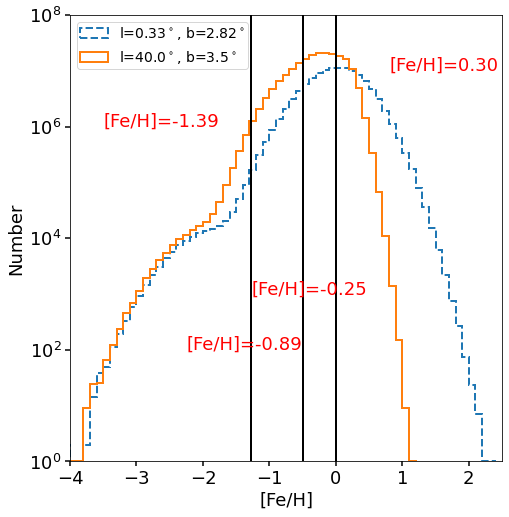

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from popsycle import ebf

plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 14
feh_l033_b282 = ebf.read('/u/casey/scratch/work/microlens/popsycle_test/v3/OGLE611ub_v3/OGLE611ub_v3.ebf' , '/feh')
feh_l40_b35 = ebf.read('/g2/scratch/mmedford/popsycle_runs/l40.0_b3.5/base0.ebf' , '/feh')

feh_bins = np.arange(-7, 3, .1)
fig, ax = plt.subplots(figsize=(8,8))
ax.hist(feh_l033_b282, bins=feh_bins, label='l=0.33$^\circ$, b=2.82$^\circ$', histtype='step', lw=2, ls='--')
ax.hist(feh_l40_b35, bins=feh_bins, label='l=40.0$^\circ$, b=3.5$^\circ$', histtype='step', lw=2, ls='-')
y = np.linspace(0, 1e10)
ax.plot(-1.28*np.ones(len(y)), y, 'k-', lw=2)
ax.plot(-0.5*np.ones(len(y)), y, 'k-', lw=2)
ax.plot(np.zeros(len(y)), y, 'k-', lw=2)
ax.legend(loc='upper left')
ax.set(xlabel='[Fe/H]', yscale='log', xlim=(-4.0, 2.5), ylim=(1, 10**8), ylabel='Number')
ax.xaxis.grid(True, which='minor')
ax.tick_params(which='both', width=1.5, length=5)
plt.text(-3.5, 1e6, '[Fe/H]=-1.39', color='r', size=18)
plt.text(-2.25, 1e2, '[Fe/H]=-0.89', color='r', size=18)
plt.text(-1.27, 1e3, '[Fe/H]=-0.25', color='r', size=18)
plt.text(0.8, 1e7, '[Fe/H]=0.30', color='r', size=18)
plt.savefig('feh_bins.png')
plt.show()

CAPTION: The distribution of [Fe/H] at two different Galaxia field locations with the chosen metallicity binning for Spera15 SPISEA clusters. Note that for Raithel18 all SPISEA clusters are solar metallicity only.

### Methods: Raithel18 and Spera15 IFMRs

In [18]:
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 10
fig, ax = plt.subplots(figsize=(6,6))

masses = np.linspace(0, 120, 240)
masses2 = np.linspace(0, 125, 300)
feh = [-1.39, -0.89, -0.25, 0.30]
label = ['Spera15 [Fe/H] = -1.39', 'Spera15 [Fe/H] = -0.89', 'Spera15 [Fe/H] = -0.25', 'Spera15 [Fe/H] = 0.30']
N_label = ['N20 [Fe/H] = -1.39', 'N20 [Fe/H] = -0.89', 'N20 [Fe/H] = -0.25', 'N20 [Fe/H] = 0.30']
color = ['r-', 'b-', 'c-', 'm-']
N_BH_color = ['ro', 'bo', 'co', 'mo']
Spera15 = ifmr.IFMR_Spera15()
Raithel18 = ifmr.IFMR_Raithel18()
N20 = ifmr.IFMR_N20_Sukhbold()
for i in range(0, len(feh)):
    S_masses, S_ID = Spera15.generate_death_mass(mass_array = masses, 
                                metallicity_array=feh[i]*np.ones(len(masses)))
    good_idx = np.where(S_ID > 0)
    ax.plot(masses[good_idx], S_masses[good_idx], color[i], label=label[i], linewidth=2)
    
    N_masses, N_ID = N20.generate_death_mass(mass_array = masses, 
                                metallicity_array=feh[i]*np.ones(len(masses)))
    N_BH_idx = np.where(N_ID >= 102)
    ax.plot(masses[N_BH_idx], N_masses[N_BH_idx], N_BH_color[i], label=N_label[i], markersize=3)
    

R_masses, R_ID = Raithel18.generate_death_mass(mass_array = masses)
good_idx = np.where(R_ID >= 102)
ax.plot(masses[good_idx], R_masses[good_idx], 'ko', label='Raithel18', markersize=3)
ax.plot(masses2, 3*np.ones(len(masses2)), 'k--', linewidth=2)
ax.set(xlabel='ZAMS Mass [$M_{\odot}$]', ylabel='Remnant Mass [$M_{\odot}$]', xscale='log', yscale='log', xlim=(10, 120), ylim=(0.8, 100))
ax.legend(loc='upper left')
ax.tick_params(which='both', width=1.5, length=5)
plt.tight_layout()
plt.savefig('IFMR_comp.png')
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


CAPTION: Final compact object mass versus ZAMS mass for Raithel18 (solar metallicity) and Spera15 (at four different metallicities corresponding to the metallicity bins shown in figure BLAH and descibed in section BLAH

### Results: Photometric microlensing paramters histograms

In [19]:
#OGLE scaling parameter
OGLE_length = 8.*365. #days
OGLE_tot_area = 1.4*32. #square degrees where 32 is the number of fields with cadende at least once/night
scale_OGLE_n_events = (OGLE_length*OGLE_tot_area)/(mock_obs_time*mock_area*len(field_list))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


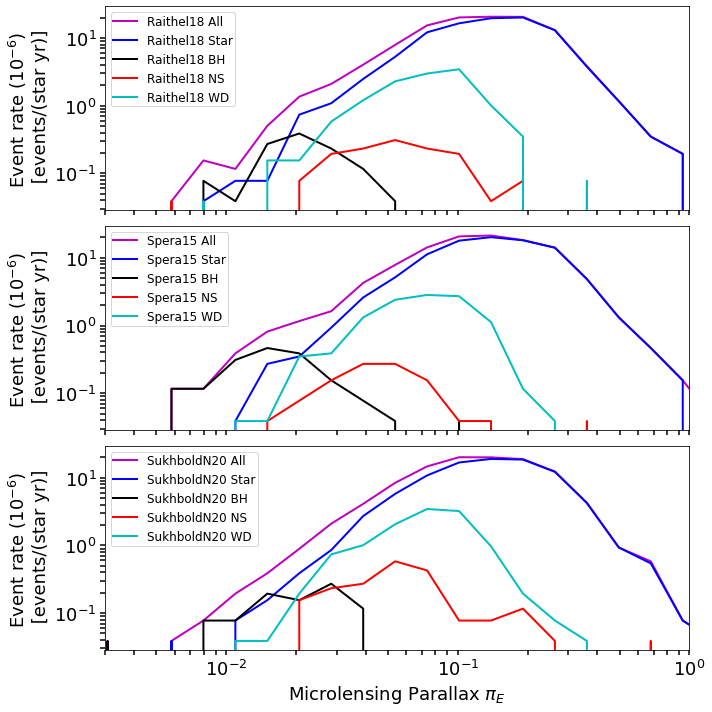

In [22]:
#piE histograms with OGLE cuts
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 12
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(10,10))
R_all_piE = np.concatenate([R_Star_piE, R_BH_piE, R_NS_piE, R_WD_piE])
S_all_piE = np.concatenate([S_Star_piE, S_BH_piE, S_NS_piE, S_WD_piE])
N_all_piE = np.concatenate([N_Star_piE, N_BH_piE, N_NS_piE, N_WD_piE])
piE_bins = np.logspace(-3, 1, 30)
scale_OGLE_S = 1e6/(OGLE_star_tot*(1000/365.25))
scale_OGLE_R = 1e6/(OGLE_star_tot*(1000/365.25))
scale_OGLE_N = 1e6/(OGLE_star_tot*(1000/365.25))
piE_bin_centers = []

for i in range(0, len(piE_bins)):
    if i < len(piE_bins)-1:
        piE_bin_centers.append(0.5*(piE_bins[i]+ piE_bins[i+1]))
        
n_S_all_piE, k = np.histogram(S_all_piE, bins=piE_bins)

n_S_BH_piE, k = np.histogram(S_BH_piE, bins=piE_bins)

n_S_NS_piE, k = np.histogram(S_NS_piE, bins=piE_bins)

n_S_WD_piE, k = np.histogram(S_WD_piE, bins=piE_bins)

n_S_Star_piE, k = np.histogram(S_Star_piE, bins=piE_bins)

n_R_all_piE, k = np.histogram(R_all_piE, bins=piE_bins)

n_R_BH_piE, k = np.histogram(R_BH_piE, bins=piE_bins)

n_R_NS_piE, k = np.histogram(R_NS_piE, bins=piE_bins)

n_R_WD_piE, k = np.histogram(R_WD_piE, bins=piE_bins)

n_R_Star_piE, k = np.histogram(R_Star_piE, bins=piE_bins)

n_N_all_piE, k = np.histogram(N_all_piE, bins=piE_bins)

n_N_BH_piE, k = np.histogram(N_BH_piE, bins=piE_bins)

n_N_NS_piE, k = np.histogram(N_NS_piE, bins=piE_bins)

n_N_WD_piE, k = np.histogram(N_WD_piE, bins=piE_bins)

n_N_Star_piE, k = np.histogram(N_Star_piE, bins=piE_bins)

ax1.errorbar(piE_bin_centers, n_R_all_piE*scale_OGLE_R, fmt='m-', lw=2, label='Raithel18 All')
ax1.errorbar(piE_bin_centers, n_R_Star_piE*scale_OGLE_R, fmt='b-', lw=2, label='Raithel18 Star')
ax1.errorbar(piE_bin_centers, n_R_BH_piE*scale_OGLE_R, fmt='k-', lw=2, label='Raithel18 BH')
ax1.errorbar(piE_bin_centers, n_R_NS_piE*scale_OGLE_R, fmt='r-', lw=2, label='Raithel18 NS')
ax1.errorbar(piE_bin_centers, n_R_WD_piE*scale_OGLE_R, fmt='c-', lw=2, label='Raithel18 WD')

ax2.errorbar(piE_bin_centers, n_S_all_piE*scale_OGLE_S, fmt='m-', lw=2, label='Spera15 All')
ax2.errorbar(piE_bin_centers, n_S_Star_piE*scale_OGLE_S, fmt='b-', lw=2, label='Spera15 Star')
ax2.errorbar(piE_bin_centers, n_S_BH_piE*scale_OGLE_S, fmt='k-', lw=2, label='Spera15 BH')
ax2.errorbar(piE_bin_centers, n_S_NS_piE*scale_OGLE_S, fmt='r-', lw=2, label='Spera15 NS')
ax2.errorbar(piE_bin_centers, n_S_WD_piE*scale_OGLE_S, fmt='c-', lw=2, label='Spera15 WD')

ax3.errorbar(piE_bin_centers, n_N_all_piE*scale_OGLE_N, fmt='m-', lw=2, label='SukhboldN20 All')
ax3.errorbar(piE_bin_centers, n_N_Star_piE*scale_OGLE_N, fmt='b-', lw=2, label='SukhboldN20 Star')
ax3.errorbar(piE_bin_centers, n_N_BH_piE*scale_OGLE_N, fmt='k-', lw=2, label='SukhboldN20 BH')
ax3.errorbar(piE_bin_centers, n_N_NS_piE*scale_OGLE_N, fmt='r-', lw=2, label='SukhboldN20 NS')
ax3.errorbar(piE_bin_centers, n_N_WD_piE*scale_OGLE_N, fmt='c-', lw=2, label='SukhboldN20 WD')


ax1.set(xscale='log', yscale='log', ylabel='Event rate ($10^{-6}$) \n [events/(star yr)]', xlim=(3e-3, 1))
ax2.set(xscale='log', yscale='log', ylabel='Event rate ($10^{-6}$) \n [events/(star yr)]')
ax3.set(xscale='log', yscale='log', xlabel='Microlensing Parallax $\pi_{E}$', 
        ylabel='Event rate ($10^{-6}$) \n [events/(star yr)]')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.tick_params(which='both', width=1.5, length=5)
ax2.tick_params(which='both', width=1.5, length=5)
ax3.tick_params(which='both', width=1.5, length=5)
plt.subplots_adjust(hspace=0.02)
plt.tight_layout()
plt.savefig('OGLE_all_scaled_piE_hist_errorbar.png')
plt.show()

CAPTION:  A histogram of microlesning parallax for events detectable by an OGLE EWS style survey by lens type for each IFMR. 

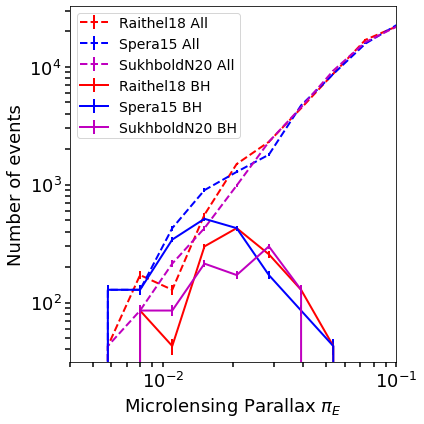

In [22]:
#piE histograms with OGLE cuts looking at the BH regime
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 14
fig, ax = plt.subplots(figsize=(6,6))
R_all_piE = np.concatenate([R_Star_piE, R_BH_piE, R_NS_piE, R_WD_piE])
S_all_piE = np.concatenate([S_Star_piE, S_BH_piE, S_NS_piE, S_WD_piE])
N_all_piE = np.concatenate([N_Star_piE, N_BH_piE, N_NS_piE, N_WD_piE])
scale_OGLE_S = scale_OGLE_n_events
scale_OGLE_R = scale_OGLE_n_events
scale_OGLE_N = scale_OGLE_n_events

piE_bins = np.logspace(-3, 1, 30) 
piE_bin_centers = []

for i in range(0, len(piE_bins)):
    if i < len(piE_bins)-1:
        piE_bin_centers.append(0.5*(piE_bins[i]+ piE_bins[i+1]))
        
n_S_all_piE, k = np.histogram(S_all_piE, bins=piE_bins)

n_S_BH_piE, k = np.histogram(S_BH_piE, bins=piE_bins)

n_R_all_piE, k = np.histogram(R_all_piE, bins=piE_bins)

n_R_BH_piE, k = np.histogram(R_BH_piE, bins=piE_bins)

n_N_all_piE, k = np.histogram(N_all_piE, bins=piE_bins)

n_N_BH_piE, k = np.histogram(N_BH_piE, bins=piE_bins)


ax.errorbar(piE_bin_centers, n_R_all_piE*scale_OGLE_R, fmt='r--', lw=2, 
             yerr=np.sqrt(n_R_all_piE*scale_OGLE_R), label='Raithel18 All')
ax.errorbar(piE_bin_centers, n_S_all_piE*scale_OGLE_S, fmt='b--', lw=2, 
            yerr=np.sqrt(n_S_all_piE*scale_OGLE_S), label='Spera15 All')
ax.errorbar(piE_bin_centers, n_N_all_piE*scale_OGLE_N, fmt='m--', lw=2, 
            yerr=np.sqrt(n_N_all_piE*scale_OGLE_N), label='SukhboldN20 All')

ax.errorbar(piE_bin_centers, n_R_BH_piE*scale_OGLE_R, fmt='r-', lw=2, 
             yerr=np.sqrt(n_R_BH_piE*scale_OGLE_R), label='Raithel18 BH')
ax.errorbar(piE_bin_centers, n_S_BH_piE*scale_OGLE_S, fmt='b-', lw=2, 
            yerr=np.sqrt(n_S_BH_piE*scale_OGLE_S), label='Spera15 BH')
ax.errorbar(piE_bin_centers, n_N_BH_piE*scale_OGLE_N, fmt='m-', lw=2, 
            yerr=np.sqrt(n_N_BH_piE*scale_OGLE_N), label='SukhboldN20 BH')

ax.tick_params(which='both', width=1.5, length=5)
ax.set(xscale='log', yscale='log', xlabel='Microlensing Parallax $\pi_{E}$', ylabel='Number of events', xlim=(.004, .1))
ax.legend()
plt.tight_layout()
plt.savefig('OGLE_BH_scaled_piE_hist_errorbar.png')
plt.show()

CAPTION: A histogram of microlesning parallax for events detectable by an OGLE EWS style survey. The solid lines indicate all lense types while the dashed lines indicate the distribution of the black hole lensing events. As piE scales with M_L^-1/2 the slight excess of low piE events in the Spera15 survey can be attributed to the more massive BHs it produces as compared to Raithel18.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


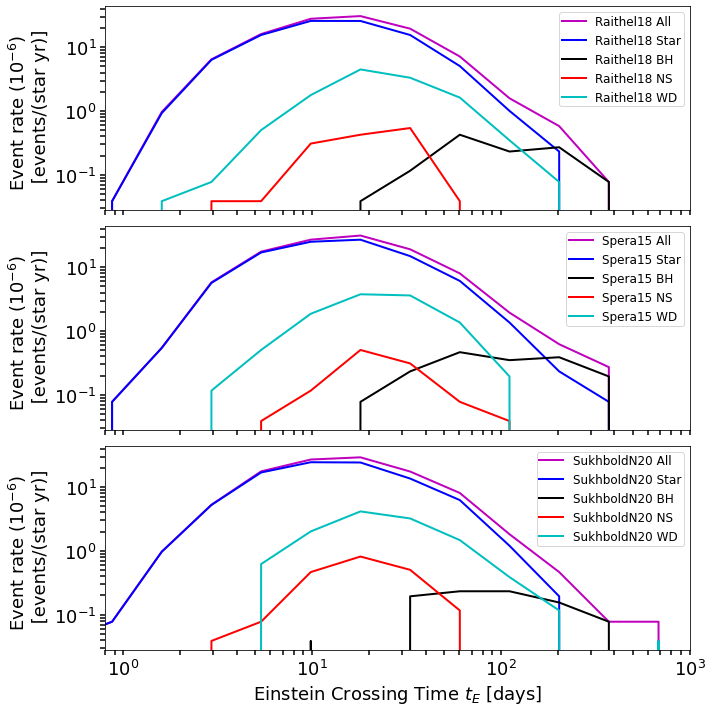

In [23]:
#tE histograms with OGLE cuts
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 12
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(10,10))
R_all_tE = np.concatenate([R_Star_tE, R_BH_tE, R_NS_tE, R_WD_tE])
S_all_tE = np.concatenate([S_Star_tE, S_BH_tE, S_NS_tE, S_WD_tE])
N_all_tE = np.concatenate([N_Star_tE, N_BH_tE, N_NS_tE, N_WD_tE])

tE_bins = np.logspace(-1, 4, 20) 
scale_OGLE_S = 1e6/(OGLE_star_tot*(1000/365))
scale_OGLE_R = 1e6/(OGLE_star_tot*(1000/365))
scale_OGLE_N = 1e6/(OGLE_star_tot*(1000/365))

tE_bin_centers = []

for i in range(0, len(tE_bins)):
    if i < len(tE_bins)-1:
        tE_bin_centers.append(0.5*(tE_bins[i]+ tE_bins[i+1]))
        
n_S_all_tE, k = np.histogram(S_all_tE, bins=tE_bins)

n_S_BH_tE, k = np.histogram(S_BH_tE, bins=tE_bins)

n_S_NS_tE, k = np.histogram(S_NS_tE, bins=tE_bins)

n_S_WD_tE, k = np.histogram(S_WD_tE, bins=tE_bins)

n_S_Star_tE, k = np.histogram(S_Star_tE, bins=tE_bins)


n_R_all_tE, k = np.histogram(R_all_tE, bins=tE_bins)

n_R_BH_tE, k = np.histogram(R_BH_tE, bins=tE_bins)

n_R_NS_tE, k = np.histogram(R_NS_tE, bins=tE_bins)

n_R_WD_tE, k = np.histogram(R_WD_tE, bins=tE_bins)

n_R_Star_tE, k = np.histogram(R_Star_tE, bins=tE_bins)


n_N_all_tE, k = np.histogram(N_all_tE, bins=tE_bins)

n_N_BH_tE, k = np.histogram(N_BH_tE, bins=tE_bins)

n_N_NS_tE, k = np.histogram(N_NS_tE, bins=tE_bins)

n_N_WD_tE, k = np.histogram(N_WD_tE, bins=tE_bins)

n_N_Star_tE, k = np.histogram(N_Star_tE, bins=tE_bins)

ax1.errorbar(tE_bin_centers, n_R_all_tE*scale_OGLE_R, fmt='m-', lw=2, label='Raithel18 All')
ax1.errorbar(tE_bin_centers, n_R_Star_tE*scale_OGLE_R, fmt='b-', lw=2, label='Raithel18 Star')
ax1.errorbar(tE_bin_centers, n_R_BH_tE*scale_OGLE_R, fmt='k-', lw=2, label='Raithel18 BH')
ax1.errorbar(tE_bin_centers, n_R_NS_tE*scale_OGLE_R, fmt='r-', lw=2, label='Raithel18 NS')
ax1.errorbar(tE_bin_centers, n_R_WD_tE*scale_OGLE_R, fmt='c-', lw=2, label='Raithel18 WD')

ax2.errorbar(tE_bin_centers, n_S_all_tE*scale_OGLE_S, fmt='m-', lw=2, label='Spera15 All')
ax2.errorbar(tE_bin_centers, n_S_Star_tE*scale_OGLE_S, fmt='b-', lw=2, label='Spera15 Star')
ax2.errorbar(tE_bin_centers, n_S_BH_tE*scale_OGLE_S, fmt='k-', lw=2, label='Spera15 BH')
ax2.errorbar(tE_bin_centers, n_S_NS_tE*scale_OGLE_S, fmt='r-', lw=2, label='Spera15 NS')
ax2.errorbar(tE_bin_centers, n_S_WD_tE*scale_OGLE_S, fmt='c-', lw=2, label='Spera15 WD')

ax3.errorbar(tE_bin_centers, n_N_all_tE*scale_OGLE_N, fmt='m-', lw=2, label='SukhboldN20 All')
ax3.errorbar(tE_bin_centers, n_N_Star_tE*scale_OGLE_N, fmt='b-', lw=2, label='SukhboldN20 Star')
ax3.errorbar(tE_bin_centers, n_N_BH_tE*scale_OGLE_N, fmt='k-', lw=2, label='SukhboldN20 BH')
ax3.errorbar(tE_bin_centers, n_N_NS_tE*scale_OGLE_N, fmt='r-', lw=2, label='SukhboldN20 NS')
ax3.errorbar(tE_bin_centers, n_N_WD_tE*scale_OGLE_N, fmt='c-', lw=2, label='SukhboldN20 WD')


ax1.set(xscale='log', yscale='log', ylabel='Event rate ($10^{-6}$)  \n [events/(star yr)]', xlim=(8e-1, 1e3))
ax2.set(xscale='log', yscale='log', ylabel='Event rate ($10^{-6}$)  \n [events/(star yr)]')
ax3.set(xscale='log', yscale='log', xlabel='Einstein Crossing Time $t_{E}$ [days]', 
        ylabel='Event rate ($10^{-6}$)  \n [events/(star yr)]')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.tick_params(which='both', width=1.5, length=5)
ax2.tick_params(which='both', width=1.5, length=5)
ax3.tick_params(which='both', width=1.5, length=5)
plt.subplots_adjust(hspace=0.02)
plt.tight_layout()
plt.savefig('OGLE_all_scaled_tE_hist_errorbar.png')
plt.show()

CAPTION: A histogram of Einstein crossing times for microlensing events detectable by an OGLE EWS style survey by lens type for each IFMR. 

24
44
30


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


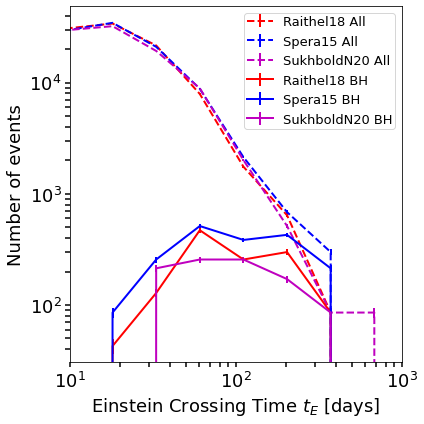

In [24]:
#tE histograms with OGLE cuts looking at the BH regime
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 13
fig, ax = plt.subplots(figsize=(6,6))
print(len(N_BH_tE))
print(len(S_BH_tE))
print(len(R_BH_tE))
S_all_tE = np.concatenate([S_Star_tE, S_BH_tE, S_NS_tE, S_WD_tE])
R_all_tE = np.concatenate([R_Star_tE, R_BH_tE, R_NS_tE, R_WD_tE]) 
N_all_tE = np.concatenate([N_Star_tE, N_BH_tE, N_NS_tE, N_WD_tE])
scale_OGLE_S = scale_OGLE_n_events
scale_OGLE_R = scale_OGLE_n_events
scale_OGLE_N = scale_OGLE_n_events

tE_bins = np.logspace(-1, 4, 20)
tE_bin_centers = []

for i in range(0, len(tE_bins)):
    if i < len(tE_bins)-1:
        tE_bin_centers.append(0.5*(tE_bins[i]+ tE_bins[i+1]))
        
n_S_all_tE, k = np.histogram(S_all_tE, bins=tE_bins)

n_S_BH_tE, k = np.histogram(S_BH_tE, bins=tE_bins)

n_R_all_tE, k = np.histogram(R_all_tE, bins=tE_bins)

n_R_BH_tE, k = np.histogram(R_BH_tE, bins=tE_bins)

n_N_all_tE, k = np.histogram(N_all_tE, bins=tE_bins)

n_N_BH_tE, k = np.histogram(N_BH_tE, bins=tE_bins)


ax.errorbar(tE_bin_centers, n_R_all_tE*scale_OGLE_R, fmt='r--', lw=2, 
             yerr=np.sqrt(n_R_all_tE*scale_OGLE_R), label='Raithel18 All')
ax.errorbar(tE_bin_centers, n_S_all_tE*scale_OGLE_S, fmt='b--', lw=2, 
            yerr=np.sqrt(n_S_all_tE*scale_OGLE_S), label='Spera15 All')
ax.errorbar(tE_bin_centers, n_N_all_tE*scale_OGLE_N, fmt='m--', lw=2, 
            yerr=np.sqrt(n_N_all_tE*scale_OGLE_N), label='SukhboldN20 All')

ax.errorbar(tE_bin_centers, n_R_BH_tE*scale_OGLE_R, fmt='r-', lw=2, 
             yerr=np.sqrt(n_R_BH_tE*scale_OGLE_R), label='Raithel18 BH')
ax.errorbar(tE_bin_centers, n_S_BH_tE*scale_OGLE_S, fmt='b-', lw=2, 
            yerr=np.sqrt(n_S_BH_tE*scale_OGLE_S), label='Spera15 BH')
ax.errorbar(tE_bin_centers, n_N_BH_tE*scale_OGLE_N, fmt='m-', lw=2, 
            yerr=np.sqrt(n_N_BH_tE*scale_OGLE_N), label='SukhboldN20 BH')

ax.tick_params(which='both', width=1.5, length=5)
ax.set(xscale='log', yscale='log', xlabel='Einstein Crossing Time $t_{E}$ [days]', ylabel='Number of events', xlim=(10, 1e3))
ax.legend()
plt.tight_layout()
plt.savefig('OGLE_BH_scaled_tE_hist_errorbar.png')
plt.show()

CAPTION: A histogram of Einstein crossing times for microlensing events detectable by an OGLE EWS style survey. The solid lines indicate all lense types while the dashed lines indicate the distribution of the black hole lensing events. As tE scales with M_L^1/2 the slight excess of long duration events in the Spera15 survey can be attributed to the more massive BHs it produces as compared to Raithel18.

### OGLE Statistical Significance

In [ ]:
#num BHs with tE greater than 100 days

In [ ]:
#num BHs with piE less than 0.02

## tE selection for OGLE

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


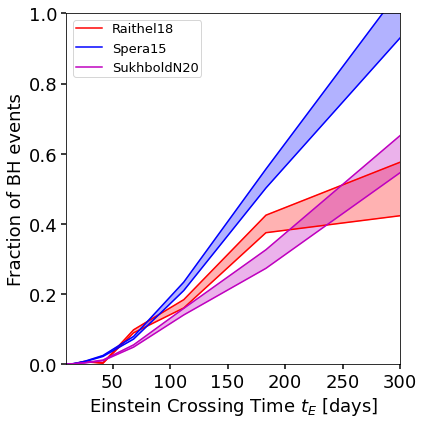

In [27]:
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 13
fig, ax = plt.subplots(figsize=(6,6))

S_all_tE = np.concatenate([S_Star_tE, S_BH_tE, S_NS_tE, S_WD_tE])
R_all_tE = np.concatenate([R_Star_tE, R_BH_tE, R_NS_tE, R_WD_tE]) 
N_all_tE = np.concatenate([N_Star_tE, N_BH_tE, N_NS_tE, N_WD_tE])
scale_OGLE_S = scale_OGLE_n_events
scale_OGLE_R = scale_OGLE_n_events
scale_OGLE_N = scale_OGLE_n_events

tE_bins = np.logspace(0, 3, 15)
min_tEs = []

for i in range(0, len(tE_bins)):
    if i < len(tE_bins)-1:
        min_tEs.append(0.5*(tE_bins[i]+ tE_bins[i+1]))
n_S_all_tE, k = np.histogram(S_all_tE, bins=tE_bins)
n_S_BH_tE, k = np.histogram(S_BH_tE, bins=tE_bins)
n_R_all_tE, k = np.histogram(R_all_tE, bins=tE_bins)
n_R_BH_tE, k = np.histogram(R_BH_tE, bins=tE_bins)
n_N_all_tE, k = np.histogram(N_all_tE, bins=tE_bins)
n_N_BH_tE, k = np.histogram(N_BH_tE, bins=tE_bins)
S_BH_frac = []
R_BH_frac =[]
N_BH_frac =[]
S_err =[]
R_err =[]
N_err =[]
for i in range(0, len(n_S_all_tE)):
    S_all_num = n_S_all_tE[i]*scale_OGLE_S
    S_BH_num = n_S_BH_tE[i]*scale_OGLE_S
    S_BH_frac.append(S_BH_num/S_all_num)
    S_err.append(np.sqrt(S_BH_num)/S_all_num)

    R_all_num = n_R_all_tE[i]*scale_OGLE_R
    R_BH_num = n_R_BH_tE[i]*scale_OGLE_R
    R_BH_frac.append(R_BH_num/R_all_num)
    R_err.append(np.sqrt(R_BH_num)/R_all_num)
    
    N_all_num = n_N_all_tE[i]*scale_OGLE_N
    N_BH_num = n_N_BH_tE[i]*scale_OGLE_N
    N_BH_frac.append(N_BH_num/N_all_num)
    N_err.append(np.sqrt(N_BH_num)/N_all_num)
    
S_BH_frac_p = np.array(S_BH_frac) + np.array(S_err)
R_BH_frac_p = np.array(R_BH_frac) + np.array(R_err)
N_BH_frac_p = np.array(N_BH_frac) + np.array(N_err)

S_BH_frac_m = np.array(S_BH_frac) - np.array(S_err)
R_BH_frac_m = np.array(R_BH_frac) - np.array(R_err)
N_BH_frac_m = np.array(N_BH_frac) - np.array(N_err)

ax.plot(min_tEs, R_BH_frac_p, 'r-', label='Raithel18')
ax.plot(min_tEs, R_BH_frac_m, 'r-')
ax.fill_between(min_tEs, R_BH_frac_m, R_BH_frac_p, color='r', alpha=0.3)

ax.plot(min_tEs, S_BH_frac_p, 'b-', label='Spera15')
ax.plot(min_tEs, S_BH_frac_m, 'b-')
ax.fill_between(min_tEs, S_BH_frac_m, S_BH_frac_p, color='b', alpha=0.3)

ax.plot(min_tEs, N_BH_frac_p, 'm-', label='SukhboldN20')
ax.plot(min_tEs, N_BH_frac_m, 'm-')
ax.fill_between(min_tEs, N_BH_frac_m, N_BH_frac_p, color='m', alpha=0.3)


ax.tick_params(which='both', width=1.5, length=5)
ax.set(xlabel='Einstein Crossing Time $t_{E}$ [days]', 
       ylabel='Fraction of BH events', xlim=(10, 300), ylim=(0,1))
ax.legend()
plt.tight_layout()
plt.savefig('OGLE_tE_frac_selection_deux.png')
plt.show()

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars


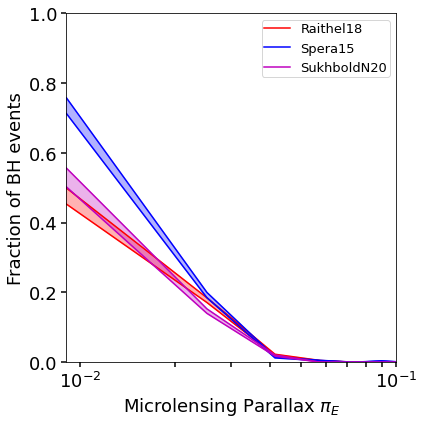

In [30]:
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 13
fig, ax = plt.subplots(figsize=(6,6))

S_all_piE = np.concatenate([S_Star_piE, S_BH_piE, S_NS_piE, S_WD_piE])
R_all_piE = np.concatenate([R_Star_piE, R_BH_piE, R_NS_piE, R_WD_piE]) 
N_all_piE = np.concatenate([N_Star_piE, N_BH_piE, N_NS_piE, N_WD_piE])
scale_OGLE_S = scale_OGLE_n_events
scale_OGLE_R = scale_OGLE_n_events
scale_OGLE_N = scale_OGLE_n_events
min_piE = np.min(R_all_piE)
max_piE = np.max([np.max(S_all_piE), np.max(R_all_piE), np.max(N_all_piE)])
piE_bins = np.linspace(0.001, max_piE, 100)
max_piEs = []

for i in range(0, len(piE_bins)):
    if i < len(piE_bins)-1:
        max_piEs.append(0.5*(piE_bins[i]+ piE_bins[i+1]))
n_S_all_piE, k = np.histogram(S_all_piE, bins=piE_bins)
n_S_BH_piE, k = np.histogram(S_BH_piE, bins=piE_bins)
n_R_all_piE, k = np.histogram(R_all_piE, bins=piE_bins)
n_R_BH_piE, k = np.histogram(R_BH_piE, bins=piE_bins)
n_N_all_piE, k = np.histogram(N_all_piE, bins=piE_bins)
n_N_BH_piE, k = np.histogram(N_BH_piE, bins=piE_bins)
S_BH_frac = []
R_BH_frac =[]
N_BH_frac =[]
S_err =[]
R_err =[]
N_err =[]
for i in range(0, len(max_piEs)):
    S_all_num = n_S_all_piE[i]*scale_OGLE_S
    S_BH_num = n_S_BH_piE[i]*scale_OGLE_S
    S_BH_frac.append(S_BH_num/S_all_num)
    #S_err.append(np.sqrt((np.sqrt(S_BH_num)/S_all_num)**2 + ((S_BH_num*np.sqrt(S_all_num))/S_all_num**2)**2))
    S_err.append(np.sqrt(S_BH_num)/S_all_num)

    R_all_num = n_R_all_piE[i]*scale_OGLE_R
    R_BH_num = n_R_BH_piE[i]*scale_OGLE_R
    R_BH_frac.append(R_BH_num/R_all_num)
    R_err.append(np.sqrt(R_BH_num)/R_all_num)
    
    N_all_num = n_N_all_piE[i]*scale_OGLE_N
    N_BH_num = n_N_BH_piE[i]*scale_OGLE_N
    N_BH_frac.append(N_BH_num/N_all_num)
    N_err.append(np.sqrt(N_BH_num)/N_all_num)
    
S_BH_frac_p = np.array(S_BH_frac) + np.array(S_err)
R_BH_frac_p = np.array(R_BH_frac) + np.array(R_err)
N_BH_frac_p = np.array(N_BH_frac) + np.array(N_err)

S_BH_frac_m = np.array(S_BH_frac) - np.array(S_err)
R_BH_frac_m = np.array(R_BH_frac) - np.array(R_err)
N_BH_frac_m = np.array(N_BH_frac) - np.array(N_err)

ax.plot(max_piEs, R_BH_frac_p, 'r-', label='Raithel18')
ax.plot(max_piEs, R_BH_frac_m, 'r-')
ax.fill_between(max_piEs, R_BH_frac_m, R_BH_frac_p, color='r', alpha=0.3)

ax.plot(max_piEs, S_BH_frac_p, 'b-', label='Spera15')
ax.plot(max_piEs, S_BH_frac_m, 'b-')
ax.fill_between(max_piEs, S_BH_frac_m, S_BH_frac_p, color='b', alpha=0.3)

ax.plot(max_piEs, N_BH_frac_p, 'm-', label='SukhboldN20')
ax.plot(max_piEs, N_BH_frac_m, 'm-')
ax.fill_between(max_piEs, N_BH_frac_m, N_BH_frac_p, color='m', alpha=0.3)


ax.tick_params(which='both', width=1.5, length=5)
ax.set(xlabel='Microlensing Parallax $\pi_{E}$', 
       ylabel='Fraction of BH events', ylim=(0,1), xlim=(min(max_piEs), 0.1), xscale='log')
ax.legend()
plt.tight_layout()
plt.savefig('OGLE_piE_frac_selection_deux.png')
plt.show()

### Birth Kick Comparison (Field 500 Roman cuts)

In [31]:
#use field 500 am doing Roman cuts
non_maxwellian_R_500 = '/u/samrose/scratch/metal_ifmr_runs/OGLE500ub_v3/OGLE500ub_v3_Raithel_Roman_single_kick_refined_events_ubv_H_Damineli16.fits'

In [32]:
#non Maxwellian (NM) with Roman cuts - this is kind of sketch because these are not Roman fields
NM_fields = [non_maxwellian_R_500]


NM_Star_tE = []
NM_Star_piE= []
NM_Star_del_m = []

NM_WD_tE = []
NM_WD_piE = []
NM_WD_del_m = []

NM_NS_tE = []
NM_NS_piE = []
NM_NS_del_m = []

NM_BH_tE = []
NM_BH_piE = []
NM_BH_del_m = []
NM_BH_mass = []


for i in range(0, len(NM_fields)):
    events, cut_events = Roman_get_stuff(NM_fields[i])
    NM_Star_tE.extend(cut_events[0][1])
    NM_Star_piE.extend(cut_events[0][2])
    NM_Star_del_m.extend(cut_events[0][4])
    
    NM_WD_tE.extend(cut_events[1][1])
    NM_WD_piE.extend(cut_events[1][2])
    NM_WD_del_m.extend(cut_events[1][4])
    
    NM_NS_tE.extend(cut_events[2][1])
    NM_NS_piE.extend(cut_events[2][2])
    NM_NS_del_m.extend(cut_events[2][4])
    print('NS', len(NM_NS_tE))
     
    NM_BH_tE.extend(cut_events[3][1])
    NM_BH_piE.extend(cut_events[3][2])
    NM_BH_del_m.extend(cut_events[3][4])
    NM_BH_mass.extend(cut_events[3][0])
    print('BH', len(NM_BH_tE))

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/table.py:2273: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


NS 532
BH 423


In [33]:
#Maxwellian (M) with Roman cuts
M_fields = [Ro_R_500]


M_Star_tE = []
M_Star_piE= []
M_Star_del_m = []

M_WD_tE = []
M_WD_piE = []
M_WD_del_m = []

M_NS_tE = []
M_NS_piE = []
M_NS_del_m = []

M_BH_tE = []
M_BH_piE = []
M_BH_del_m = []
M_BH_mass = []


for i in range(0, len(M_fields)):
    events, cut_events = Roman_get_stuff(M_fields[i])
    M_Star_tE.extend(cut_events[0][1])
    M_Star_piE.extend(cut_events[0][2])
    M_Star_del_m.extend(cut_events[0][4])
    
    M_WD_tE.extend(cut_events[1][1])
    M_WD_piE.extend(cut_events[1][2])
    M_WD_del_m.extend(cut_events[1][4])
    
    M_NS_tE.extend(cut_events[2][1])
    M_NS_piE.extend(cut_events[2][2])
    M_NS_del_m.extend(cut_events[2][4])
    print('NS', len(M_NS_tE))
     
    M_BH_tE.extend(cut_events[3][1])
    M_BH_piE.extend(cut_events[3][2])
    M_BH_del_m.extend(cut_events[3][4])
    M_BH_mass.extend(cut_events[3][0])
    print('BH', len(M_BH_tE))

NS 496
BH 395


In [34]:
#tE histograms with Roman cuts looking at the difference between maxwellian and non-maxwellian birth kicks
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 13
fig, ax = plt.subplots(figsize=(6,6))
M_all_tE = np.concatenate([M_Star_tE, M_BH_tE, M_NS_tE, M_WD_tE])
NM_all_tE = np.concatenate([NM_Star_tE, NM_BH_tE, NM_NS_tE, NM_WD_tE]) 

#attempt a scaling 
my_survey_time = 1000.0 #days
my_survey_area = 0.34*3 #square degrees
penny_survey_time = 6.0*365.0 #days
penny_survey_area = 1.97 #square degrees
Ro_scale = (penny_survey_time*penny_survey_area)/(my_survey_time*my_survey_area)

tE_bins = np.logspace(-1, 4, 25)
tE_bin_centers = []

for i in range(0, len(tE_bins)):
    if i < len(tE_bins)-1:
        tE_bin_centers.append(0.5*(tE_bins[i]+ tE_bins[i+1]))
        
n_M_all_tE, k = np.histogram(M_all_tE, bins=tE_bins)

n_M_BH_tE, k = np.histogram(M_BH_tE, bins=tE_bins)

n_M_NS_tE, k = np.histogram(M_NS_tE, bins=tE_bins)

n_NM_all_tE, k = np.histogram(NM_all_tE, bins=tE_bins)

n_NM_BH_tE, k = np.histogram(NM_BH_tE, bins=tE_bins)

n_NM_NS_tE, k = np.histogram(NM_NS_tE, bins=tE_bins)

ax.errorbar(tE_bin_centers, n_NM_all_tE*Ro_scale, fmt='m-', lw=2, 
             yerr=np.sqrt(n_NM_all_tE*Ro_scale), label='Constant All')

ax.errorbar(tE_bin_centers, n_M_all_tE*Ro_scale, fmt='m--', lw=2, 
            yerr=np.sqrt(n_M_all_tE*Ro_scale), label='Maxwellian All')

ax.errorbar(tE_bin_centers, n_NM_BH_tE*Ro_scale, fmt='k-', lw=2, 
             yerr=np.sqrt(n_NM_BH_tE*Ro_scale), label='Constant BH')

ax.errorbar(tE_bin_centers, n_M_BH_tE*Ro_scale, fmt='k--', lw=2, 
            yerr=np.sqrt(n_M_BH_tE*Ro_scale), label='Mawellian BH')

ax.errorbar(tE_bin_centers, n_NM_NS_tE*Ro_scale, fmt='r-', lw=2, 
             yerr=np.sqrt(n_NM_NS_tE*Ro_scale), label='Constant NS')

ax.errorbar(tE_bin_centers, n_M_NS_tE*Ro_scale, fmt='r--', lw=2, 
            yerr=np.sqrt(n_M_NS_tE*Ro_scale), label='Mawellian NS')

ax.tick_params(which='both', width=1.5, length=5)
ax.set(xscale='log', yscale='log', xlabel='Einstein Crossing Time $t_{E}$ [days]', ylabel='Number of events', xlim=(2, 3e3))
ax.legend()
plt.tight_layout()
plt.savefig('birthkick_comp_scaled_tE_hist_errorbar.png')
plt.show()

### RESULTS: tE and piE scatter plot for OGLE

In [35]:
#piE tE plot (with OGLE cuts)
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 12

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(10,10))
ax1.scatter(S_Star_tE, S_Star_piE, marker= 'o', label="Spera15 Stars", alpha=0.3, 
            facecolor='b', edgecolor='None', s=10)
ax1.scatter(S_BH_tE, S_BH_piE, marker= 'o', label="Spera15 BHs", alpha=1, 
            facecolor='k', edgecolor='None', s=25)
ax1.scatter(S_NS_tE, S_NS_piE, marker= 'o', label="Spera15 NSs", alpha=1, 
            facecolor='r', edgecolor='None', s=18)
ax1.scatter(S_WD_tE, S_WD_piE, marker= 'o', label="Spera15 WDs", alpha=0.7, 
            facecolor='c', edgecolor='None', s=15)
ax1.set(xscale='log', yscale='log', ylabel='$\pi_{E}$')
leg = ax1.legend(loc='upper right', markerscale=2)
for l in leg.legendHandles:
    l.set_alpha(1)
ax1.tick_params(which='both', width=1.5, length=5)

ax2.scatter(R_Star_tE, R_Star_piE, marker= 'o', label="Raithel18 Stars", alpha=0.3, 
            facecolor='b', edgecolor='None', s=10)
ax2.scatter(R_BH_tE, R_BH_piE, marker= 'o', label="Raithel18 BHs", alpha=1, 
            facecolor='k', edgecolor='None', s=25)
ax2.scatter(R_NS_tE, R_NS_piE, marker= 'o', label="Raithel18 NSs", alpha=1, 
            facecolor='r', edgecolor='None', s=18)
ax2.scatter(R_WD_tE, R_WD_piE, marker= 'o', label="Raithel18 WDs", alpha=0.7, 
            facecolor='c', edgecolor='None', s=15)
ax2.set(xscale='log', yscale='log', ylabel='$\pi_{E}$')
leg = ax2.legend(loc='upper right', markerscale=2)
for l in leg.legendHandles:
    l.set_alpha(1)
ax2.tick_params(which='both', width=1.5, length=5)

ax3.scatter(N_Star_tE, N_Star_piE, marker= 'o', label="SukhboldN20 Stars", alpha=0.3, 
            facecolor='b', edgecolor='None', s=10)
ax3.scatter(N_BH_tE, N_BH_piE, marker= 'o', label="SukhboldN20 BHs", alpha=1, 
            facecolor='k', edgecolor='None', s=25)
ax3.scatter(N_NS_tE, N_NS_piE, marker= 'o', label="SukhboldN20 NSs", alpha=1, 
            facecolor='r', edgecolor='None', s=18)
ax3.scatter(N_WD_tE, N_WD_piE, marker= 'o', label="SukhboldN20 WDs", alpha=0.7, 
            facecolor='c', edgecolor='None', s=15)
ax3.set(xscale='log', yscale='log', xlabel='$t_{E} [days]$', ylabel='$\pi_{E}$', ylim=(.003, 1), xlim=(2, 600))
leg = ax3.legend(loc='upper right', markerscale=2)
for l in leg.legendHandles:
    l.set_alpha(1)
ax3.tick_params(which='both', width=1.5, length=5)

plt.subplots_adjust(hspace=0.05)
plt.tight_layout()
plt.savefig('OGLE_cuts_tE_piE_scatter.png')
plt.show() 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


CAPTION: Microlensing parallax versus Einstein crossing time for all events detectable by an OGLE EWS type survey identified by lens type. Both Raithel18 (see Lam) and Spera15 black hole lensing events are at long tE and low piE as compared to pther types of lenses. The addition of the more massive Spera15 BH lenses indicates that events with very low piE even at shorter tE are likely to be good black hole microlensing candidates.

### Results: Lens mass distribution

[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69]


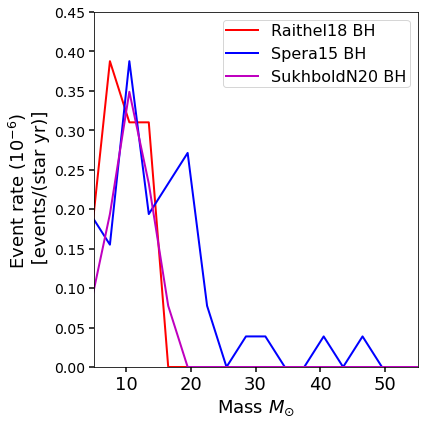

In [49]:
# BH lens mass hist (with OGLE cuts, not scaled by OGLE)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 16

S_all_tE = np.concatenate([S_Star_tE, S_BH_tE, S_NS_tE, S_WD_tE])
R_all_tE = np.concatenate([R_Star_tE, R_BH_tE, R_NS_tE, R_WD_tE]) 
N_all_tE = np.concatenate([N_Star_tE, N_BH_tE, N_NS_tE, N_WD_tE])

scale_OGLE_S = 1e6/(OGLE_star_tot*(1000/365))
scale_OGLE_R = 1e6/(OGLE_star_tot*(1000/365))
scale_OGLE_N = 1e6/(OGLE_star_tot*(1000/365))

fig, ax = plt.subplots(figsize=(6,6))
mass_bins = np.arange(0, 70, 3)
print(mass_bins)
#mass_bins = np.concatenate([np.arange(0, 30, 2), np.arange(30,55,5)])



mass_bin_centers = []
for i in range(0, len(mass_bins)):
    if i < len(mass_bins)-1:
        mass_bin_centers.append(0.5*(mass_bins[i]+ mass_bins[i+1]))
        

n_S_BH_mass, k = np.histogram(S_BH_mass, bins=mass_bins)

n_R_BH_mass, k = np.histogram(R_BH_mass, bins=mass_bins)

n_N_BH_mass, k = np.histogram(N_BH_mass, bins=mass_bins)


#ax.errorbar(mass_bin_centers, n_R_BH_mass*scale_OGLE_R, fmt='r-', lw=2, 
 #            yerr=np.sqrt(n_R_BH_mass)*(scale_OGLE_R), label='Raithel18 BH')
#ax.errorbar(mass_bin_centers, n_S_BH_mass*scale_OGLE_S, fmt='b-', lw=2, 
 #           yerr=np.sqrt(n_S_BH_mass)*(scale_OGLE_S), label='Spera15 BH')
#ax.errorbar(mass_bin_centers, n_N_BH_mass*scale_OGLE_N, fmt='m-', lw=2, 
           # yerr=np.sqrt(n_N_BH_mass)*(scale_OGLE_N), label='SukhboldN20 BH')
ax.plot(mass_bin_centers, n_R_BH_mass*scale_OGLE_R, 'r-', lw=2, 
              label='Raithel18 BH')
ax.plot(mass_bin_centers, n_S_BH_mass*scale_OGLE_S, 'b-', lw=2, 
             label='Spera15 BH')
ax.plot(mass_bin_centers, n_N_BH_mass*scale_OGLE_N, 'm-', lw=2, 
             label='SukhboldN20 BH')
ax.legend()
ax.set(xlabel='Mass $M_{\odot}$', ylabel='Event rate ($10^{-6}$) \n [events/(star yr)]', xlim=(5,55), ylim=(0, 0.45))
ax.tick_params(which='both', width=1.5, length=5)
plt.tight_layout()
plt.savefig('lens_mass.png')
plt.show()

CAPTION:  Mass distribution of black hole lenses for lensing events dectable by an OGLE EWS style survey. The Spera15 black hole lensing events allow for much more massive lenses as compared to Raithel18. 

### Results: piE and tE plotss (everything so far has been OGLE style survey, make the same plots but this time for Roman)

In [34]:
def make_Roman_cadence_cuts(t0, tE):
    """
    t0 and tE should have the same length
    runs are 1000 days long and sample every 10 days 
    """
    season_len = 72 #days, Penny WFIRST Cycle 7
    season_num = 5 #should be 6, dropping 1
    mission_len = 5*365 #days (5 years)
    #assume 72 day seasons evenly spaced over 5 years
    #need 1825 days total
    # have 5 304 day seasons which will have 72 days of observation at the start
    Roman_days = np.zeros(2000)
    for n in range(0, 5):
        for i in range(365*n, 365*n+72):
            Roman_days[i] = 1
            
    #1 year with 2 seasons on the eqionoxes, jan 1st to dec 31st
    two_seasons = 
    #1 year with 1 season on the fall equinox
    one_fall =
    #1 year with 1 season on the spring equinox
    one_spring =
    
    #six seasons, three on each end
    six_seasons =
    #ten seasons, one on each equinox
    ten_seasons = 
    
            
    #consider two 1000 day runs
    t02 = np.array(t0) + 1000
    tE2 = tE
    
    good_idx1 = []
    bad_idx1 = []
    for i in range(0, len(tE)):
        event_len = 4*tE[i]
        event_days = np.zeros(2000)
        for j in range(int(t0[i]-2*tE[i]), int(t0[i]+2*tE[i])):
            if j < 1:
                continue
            elif j >= 2000:
                continue
            event_days[j] = 1
            
        days_obs = sum(event_days*Roman_days)
        
        if days_obs/event_len > 0.5:
            good_idx1.append(i)
        if days_obs/event_len < 0.5:
            bad_idx1.append(i)
            
    good_idx2 = []
    bad_idx2 = []
    for i in range(0, len(tE)):
        event_len = 4*tE[i]
        event_days = np.zeros(2000)
        for j in range(int(t02[i]-2*tE2[i]), int(t02[i]+2*tE2[i])):
            if j < 1:
                continue
            elif j >= 2000:
                continue
            event_days[j] = 1
            
        days_obs = sum(event_days*Roman_days)
        
        if days_obs/event_len > 0.5:
            good_idx2.append(i)
        if days_obs/event_len < 0.5:
            bad_idx2.append(i)
            
    return np.array(good_idx1), np.array(bad_idx1), np.array(good_idx2), np.array(bad_idx2)

In [ ]:
def make_Roman_cadence_cuts(t0, tE, seasons='six'):
    """
    t0 and tE should have the same length
    runs are 1000 days long and sample every 10 days 
    Roman days should be 'six' or 'ten'
    """
    season_len = 72 #days, Penny WFIRST Cycle 7
    season_num = 5 #should be 6, dropping 1
    mission_len = 5*365 #days (5 years)
            
    #1 year with 2 seasons on the eqionoxes, jan 1st to dec 31st
    two_seasons = 
    #1 year with 1 season on the fall equinox
    one_fall =
    #1 year with 1 season on the spring equinox
    one_spring =
    
    #six seasons, three on each end
    six_seasons = np.append(np.zeros(500), [two_seasons, one_spring, np.zeros(365), one_fall, two_seasons])
    #ten seasons, one on each equinox
    ten_seasons = np.append(np.zeros(500), [two_seasons, two_seasons, two_seasons, two_seasons, two_seasons])
    
    if seasons == 'six':
        Roman_days = six_seasons
    elif seasons == 'ten':
        Roman_days = ten_seasons
    else:
        print('FUCK')
    
            
    #consider two 1000 day runs, 1 starts at 500 days in (also start of Roman 5 year survey)
    t01 = np.array(t0) + 500
    tE1 = tE
    t02 = np.array(t0) + 1500
    tE2 = tE
    
    good_idx1 = []
    bad_idx1 = []
    for i in range(0, len(tE)):
        event_len = 4*tE[i]
        event_days = np.zeros(3000)
        for j in range(int(t01[i]-2*tE1[i]), int(t01[i]+2*tE1[i])):
            if j < 1:
                continue
            elif j >= 3000:
                continue
            event_days[j] = 1
            
        days_obs = sum(event_days*Roman_days)
        
        if days_obs/event_len > 0.5:
            good_idx1.append(i)
        if days_obs/event_len < 0.5:
            bad_idx1.append(i)
            
    good_idx2 = []
    bad_idx2 = []
    for i in range(0, len(tE)):
        event_len = 4*tE[i]
        event_days = np.zeros(3000)
        for j in range(int(t02[i]-2*tE2[i]), int(t02[i]+2*tE2[i])):
            if j < 1:
                continue
            elif j >= 3000:
                continue
            event_days[j] = 1
            
        days_obs = sum(event_days*Roman_days)
        
        if days_obs/event_len > 0.5:
            good_idx2.append(i)
        if days_obs/event_len < 0.5:
            bad_idx2.append(i)
            
    return np.array(good_idx1), np.array(bad_idx1), np.array(good_idx2), np.array(bad_idx2)

In [1]:
#attempt a scaling 
my_survey_area = 0.34*3 #square degrees
penny_survey_area = 1.97 #square degrees
Ro_scale = penny_survey_area/my_survey_area
seasons = 'six'

Ro_R_all_piE = np.concatenate([Ro_R_Star_piE, Ro_R_BH_piE, Ro_R_NS_piE, Ro_R_WD_piE])
Ro_S_all_piE = np.concatenate([Ro_S_Star_piE, Ro_S_BH_piE, Ro_S_NS_piE, Ro_S_WD_piE])
Ro_N_all_piE = np.concatenate([Ro_N_Star_piE, Ro_N_BH_piE, Ro_N_NS_piE, Ro_N_WD_piE])

Ro_S_all_tE = np.concatenate([Ro_S_Star_tE, Ro_S_BH_tE, Ro_S_NS_tE, Ro_S_WD_tE])
Ro_R_all_tE = np.concatenate([Ro_R_Star_tE, Ro_R_BH_tE, Ro_R_NS_tE, Ro_R_WD_tE]) 
Ro_N_all_tE = np.concatenate([Ro_N_Star_tE, Ro_N_BH_tE, Ro_N_NS_tE, Ro_N_WD_tE])

Ro_S_all_t0 = np.concatenate([Ro_S_Star_t0, Ro_S_BH_t0, Ro_S_NS_t0, Ro_S_WD_t0])
Ro_R_all_t0 = np.concatenate([Ro_R_Star_t0, Ro_R_BH_t0, Ro_R_NS_t0, Ro_R_WD_t0]) 
Ro_N_all_t0 = np.concatenate([Ro_N_Star_t0, Ro_N_BH_t0, Ro_N_NS_t0, Ro_N_WD_t0])

#make cadence cut for all events
R_all_good1, R_all_bad1, R_all_good2, R_all_bad2 = make_Roman_cadence_cuts(Ro_R_all_t0, Ro_R_all_tE, seasons)
S_all_good1, S_all_bad1, S_all_good2, S_all_bad2 = make_Roman_cadence_cuts(Ro_S_all_t0, Ro_S_all_tE, seasons)
N_all_good1, N_all_bad1, N_all_good2, N_all_bad2 = make_Roman_cadence_cuts(Ro_N_all_t0, Ro_N_all_tE, seasons)
print((len(R_all_good1)+len(R_all_good2), len(R_all_bad1)+len(R_all_bad2))
print((len(R_all_good1)+len(R_all_good2))/(len(R_all_bad1)+len(R_all_bad2)+len(R_all_good1)+len(R_all_good2)))

#make cadence cut for BH events
R_BH_good1, R_BH_bad1, R_BH_good2, R_BH_bad2 = make_Roman_cadence_cuts(Ro_R_BH_t0, Ro_R_BH_tE, seasons)
S_BH_good1, S_BH_bad1, S_BH_good2, S_BH_bad2 = make_Roman_cadence_cuts(Ro_S_BH_t0, Ro_S_BH_tE, seasons)
N_BH_good1, N_BH_bad1, N_BH_good2, N_BH_bad2 = make_Roman_cadence_cuts(Ro_N_BH_t0, Ro_N_BH_tE, seasons)

print(len(R_BH_good1)+len(R_BH_good2), len(R_BH_bad1)+len(R_BH_bad2)+len(R_BH_good1)+len(R_BH_good2))
print(len(R_BH_good1)+len(R_BH_good2)/(len(R_BH_bad1)+len(R_BH_bad2)+len(R_BH_good1)+len(R_BH_good2)))

Ro_S_all_tE = np.concatenate((Ro_S_all_tE[S_all_good1], Ro_S_all_tE[S_all_good2]))
Ro_S_all_piE = np.concatenate((Ro_S_all_piE[S_all_good1], Ro_S_all_piE[S_all_good2]))

Ro_R_all_tE = np.concatenate((Ro_R_all_tE[R_all_good1], Ro_R_all_tE[R_all_good2]))
Ro_R_all_piE = np.concatenate((Ro_R_all_piE[R_all_good1], Ro_R_all_piE[R_all_good2]))

Ro_N_all_tE = np.concatenate((Ro_N_all_tE[N_all_good1], Ro_N_all_tE[N_all_good2]))
Ro_N_all_piE = np.concatenate((Ro_N_all_piE[N_all_good1], Ro_N_all_piE[N_all_good2]))

Ro_S_BH_tE = np.concatenate((Ro_S_BH_tE[S_BH_good1], Ro_S_BH_tE[S_BH_good2]))
Ro_S_BH_piE = np.concatenate((Ro_S_BH_piE[S_BH_good1], Ro_S_BH_piE[S_BH_good2]))

Ro_R_BH_tE = np.concatenate((Ro_R_BH_tE[R_BH_good1], Ro_R_BH_tE[R_BH_good2]))
Ro_R_BH_piE = np.concatenate((Ro_R_BH_piE[R_BH_good1], Ro_R_BH_piE[R_BH_good2]))

Ro_N_BH_tE = np.concatenate((Ro_N_BH_tE[N_BH_good1], Ro_N_BH_tE[N_BH_good2]))
Ro_N_BH_piE = np.concatenate((Ro_N_BH_piE[N_BH_good1], Ro_N_BH_piE[N_BH_good2]))

NameError: name 'np' is not defined

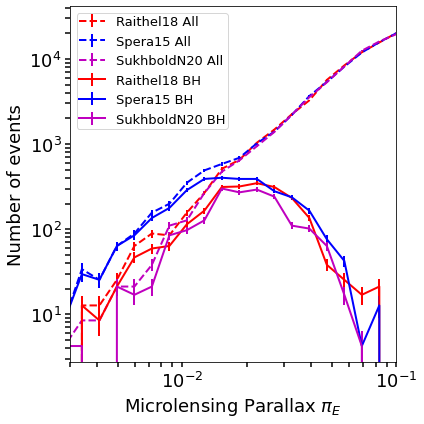

In [28]:
#piE histograms with Roman cuts looking at the BH regime
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 13

fig, ax = plt.subplots(figsize=(6,6))
piE_bins = np.logspace(-3, 1, 30)


piE_bins = np.logspace(-3, 1, 50) 
piE_bin_centers = []

for i in range(0, len(piE_bins)):
    if i < len(piE_bins)-1:
        piE_bin_centers.append(0.5*(piE_bins[i]+ piE_bins[i+1]))
        
n_S_all_piE, k = np.histogram(Ro_S_all_piE, bins=piE_bins)

n_S_BH_piE, k = np.histogram(Ro_S_BH_piE, bins=piE_bins)

n_R_all_piE, k = np.histogram(Ro_R_all_piE, bins=piE_bins)

n_R_BH_piE, k = np.histogram(Ro_R_BH_piE, bins=piE_bins)

n_N_all_piE, k = np.histogram(Ro_N_all_piE, bins=piE_bins)

n_N_BH_piE, k = np.histogram(Ro_N_BH_piE, bins=piE_bins)


ax.errorbar(piE_bin_centers, n_R_all_piE*Ro_scale, fmt='r--', lw=2, 
             yerr=np.sqrt(n_R_all_piE*Ro_scale), label='Raithel18 All')
ax.errorbar(piE_bin_centers, n_S_all_piE*Ro_scale, fmt='b--', lw=2, 
            yerr=np.sqrt(n_S_all_piE*Ro_scale), label='Spera15 All')
ax.errorbar(piE_bin_centers, n_N_all_piE*Ro_scale, fmt='m--', lw=2, 
            yerr=np.sqrt(n_N_all_piE*Ro_scale), label='SukhboldN20 All')

ax.errorbar(piE_bin_centers, n_R_BH_piE*Ro_scale, fmt='r-', lw=2, 
             yerr=np.sqrt(n_R_BH_piE*Ro_scale), label='Raithel18 BH')
ax.errorbar(piE_bin_centers, n_S_BH_piE*Ro_scale, fmt='b-', lw=2, 
            yerr=np.sqrt(n_S_BH_piE*Ro_scale), label='Spera15 BH')
ax.errorbar(piE_bin_centers, n_N_BH_piE*Ro_scale, fmt='m-', lw=2, 
            yerr=np.sqrt(n_N_BH_piE*Ro_scale), label='SukhboldN20 BH')

ax.tick_params(which='both', width=1.5, length=5)
ax.set(xscale='log', yscale='log', xlabel='Microlensing Parallax $\pi_{E}$', ylabel='Number of events', xlim=(3e-3, 1e-1))
ax.legend()
plt.tight_layout()
plt.savefig('Roman_BH_scaled_piE_hist_errorbar.png')
plt.show()

CAPTION: A histogram of microlesning parallax for events detectable by a Roman style survey. The solid lines indicate all lense types while the dashed lines indicate the distribution of the black hole lensing events. As piE scales with M_L^-1/2 the slight excess of low piE events in the Spera15 survey can be attributed to the more massive BHs it produces as compared to Raithel18.

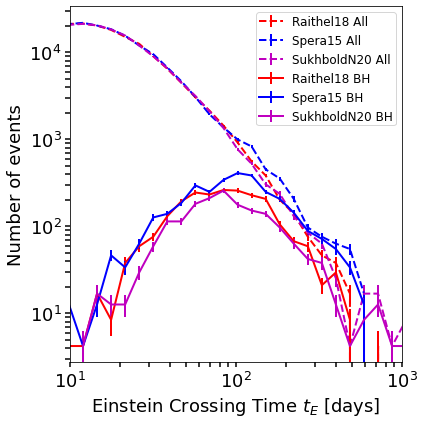

In [29]:
#tE histograms with Roman cuts looking at the BH regime
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 12
fig, ax = plt.subplots(figsize=(6,6))


tE_bins = np.logspace(-1, 4, 60)
tE_bin_centers = []

for i in range(0, len(tE_bins)):
    if i < len(tE_bins)-1:
        tE_bin_centers.append(0.5*(tE_bins[i]+ tE_bins[i+1]))
        
n_S_all_tE, k = np.histogram(Ro_S_all_tE, bins=tE_bins)

n_S_BH_tE, k = np.histogram(Ro_S_BH_tE, bins=tE_bins)

n_R_all_tE, k = np.histogram(Ro_R_all_tE, bins=tE_bins)

n_R_BH_tE, k = np.histogram(Ro_R_BH_tE, bins=tE_bins)

n_N_all_tE, k = np.histogram(Ro_N_all_tE, bins=tE_bins)

n_N_BH_tE, k = np.histogram(Ro_N_BH_tE, bins=tE_bins)


ax.errorbar(tE_bin_centers, n_R_all_tE*Ro_scale, fmt='r--', lw=2, 
             yerr=np.sqrt(n_R_all_tE*Ro_scale), label='Raithel18 All')
ax.errorbar(tE_bin_centers, n_S_all_tE*Ro_scale, fmt='b--', lw=2, 
            yerr=np.sqrt(n_S_all_tE*Ro_scale), label='Spera15 All')
ax.errorbar(tE_bin_centers, n_N_all_tE*Ro_scale, fmt='m--', lw=2, 
            yerr=np.sqrt(n_N_all_tE*Ro_scale), label='SukhboldN20 All')

ax.errorbar(tE_bin_centers, n_R_BH_tE*Ro_scale, fmt='r-', lw=2, 
             yerr=np.sqrt(n_R_BH_tE*Ro_scale), label='Raithel18 BH')
ax.errorbar(tE_bin_centers, n_S_BH_tE*Ro_scale, fmt='b-', lw=2, 
            yerr=np.sqrt(n_S_BH_tE*Ro_scale), label='Spera15 BH')
ax.errorbar(tE_bin_centers, n_N_BH_tE*Ro_scale, fmt='m-', lw=2, 
            yerr=np.sqrt(n_N_BH_tE*Ro_scale), label='SukhboldN20 BH')

ax.tick_params(which='both', width=1.5, length=5)
ax.set(xscale='log', yscale='log', xlabel='Einstein Crossing Time $t_{E}$ [days]', ylabel='Number of events', xlim=(10, 1e3))
ax.legend()
plt.tight_layout()
plt.savefig('Roman_BH_scaled_tE_hist_errorbar.png')
plt.show()

CAPTION: A histogram of Einstein crossing times for microlensing events detectable by a Roman style survey. The solid lines indicate all lense types while the dashed lines indicate the distribution of the black hole lensing events. As tE scales with M_L^1/2 the slight excess of long duration events in the Spera15 survey can be attributed to the more massive BHs it produces as compared to Raithel18.

### DISCUSSION: Comparison with LIGO mass functions

In [30]:
mass_MP = []
value_MP = []

f_csv = open('/u/samrose/scratch/metal_ifmr_runs/Multi_Peak.csv', 'r')
read = csv.reader(f_csv, delimiter = ',' )
for row in read:
    mass_MP.append(float(row[0]))
    value_MP.append(float(row[1]))
f_csv.close()
integral_MP = np.trapz(value_MP, mass_MP)

In [31]:
mass_BPL = []
value_BPL = []

f_csv = open('/u/samrose/scratch/metal_ifmr_runs/Broken_Power_Law.csv', 'r')
read = csv.reader(f_csv, delimiter = ',' )
for row in read:
    mass_BPL.append(float(row[0]))
    value_BPL.append(float(row[1]))
f_csv.close()
integral_BPL = np.trapz(value_BPL, mass_BPL)

The total number of Spera15 BHs is 2.6661e+08
The total number of Raithel18 BHs is 2.1801e+08
The total number of N20 BHs is 1.7226e+08
The total number of LIGO BHs is forced to be 2.5041e+08


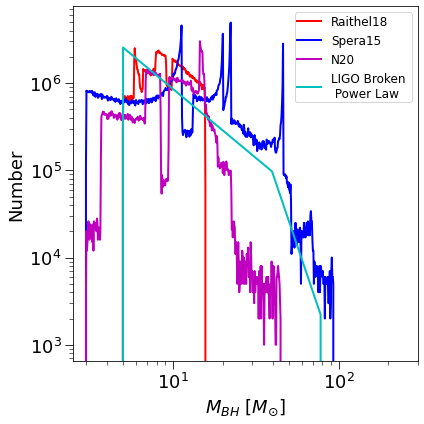

In [32]:
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 12
fig, ax = plt.subplots(figsize=(6,6))
R = Table.read('/u/samrose/scratch/metal_ifmr_runs/Raithel_bh_ns_masses_10E-3.fits', format='fits')
S = Table.read('/u/samrose/scratch/metal_ifmr_runs/Spera_bh_ns_masses_10E-3.fits', format='fits')
N = Table.read('/u/samrose/scratch/metal_ifmr_runs/N20_bh_ns_masses_10E-3.fits', format='fits')

R_BH_idx = np.where(R['phase']==103)[0]
S_BH_idx = np.where(S['phase']==103)[0]
N_BH_idx = np.where(N['phase']==103)[0]
mass_bins = np.logspace(0, 3, 1000)
S_counts, S_bin_edges = np.histogram(S['mass_current'][S_BH_idx], bins=mass_bins)
mass_bin_cent = np.zeros(len(S_counts))

for i in range(0, len(S_counts)):
    mass_bin_cent[i] = 0.5*(S_bin_edges[i]+S_bin_edges[i+1])
    
R_counts, R_bin_edges = np.histogram(R['mass_current'][R_BH_idx], bins=mass_bins)
N_counts, N_bin_edges = np.histogram(N['mass_current'][N_BH_idx], bins=mass_bins)

print('The total number of Spera15 BHs is {:.4e}'.format(np.sum(S_counts)*1.0e3))
print('The total number of Raithel18 BHs is {:.4e}'.format(np.sum(R_counts)*1.0e3))
print('The total number of N20 BHs is {:.4e}'.format(np.sum(N_counts)*1.0e3))


BH_num = np.average([np.sum(S_counts)*1.0e3, np.sum(R_counts)*1.0e3, np.sum(S_counts)*1.0e3])
print('The total number of LIGO BHs is forced to be {:.4e}'.format(BH_num))

BPL_alpha1 = -1.58
BPL_alpha2 = -5.6
BPL_m_break = 39.7
BPL_m_min = 5.0
BPL_m_max = 78.0

BPL_mass_limits = np.array([BPL_m_min, BPL_m_break, BPL_m_max])
BPL_slopes = np.array([BPL_alpha1, BPL_alpha2])

BPL_imf = imf.IMF_broken_powerlaw(BPL_mass_limits, BPL_slopes)
BPL_imf.normalize(BH_num)
BPL_pdf = BPL_imf.xi(mass_bins)




MP_pdf = BPL_pdf

ax.plot(mass_bin_cent, R_counts*1.0e3, 'r-', 
        label='Raithel18', linewidth=2)
ax.plot(mass_bin_cent, S_counts*1.0e3, 'b-', 
        label='Spera15', linewidth=2)
ax.plot(mass_bin_cent, N_counts*1.0e3, 'm-', 
        label='N20', linewidth=2)
#ax.plot(mass_bins, MP_pdf, 
        #'m-', label='LIGO Multi Peak', linewidth=2)
ax.plot(mass_bins, BPL_pdf,
        'c-', label='LIGO Broken \n Power Law', linewidth=2)
ax.set(yscale='log', xscale='log', 
       xlabel='$M_{BH}$ [$M_{\odot}$]', ylabel='Number',
      xlim=(2.5, 300))  
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig('LIGO_comp.png')
plt.show()


The total number of Spera15 BHs is 2.6661e+08
The total number of Raithel18 BHs is 2.1801e+08
The total number of N20 BHs is 1.7226e+08
The total number of LIGO BHs is forced to be 2.5041e+08


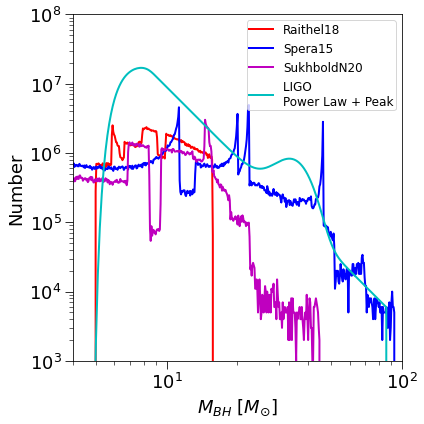

In [33]:
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 12
fig, ax = plt.subplots(figsize=(6,6))
R = Table.read('/u/samrose/scratch/metal_ifmr_runs/Raithel_bh_ns_masses_10E-3.fits', format='fits')
S = Table.read('/u/samrose/scratch/metal_ifmr_runs/Spera_bh_ns_masses_10E-3.fits', format='fits')
N = Table.read('/u/samrose/scratch/metal_ifmr_runs/N20_bh_ns_masses_10E-3.fits', format='fits')

R_BH_idx = np.where(R['phase']==103)[0]
S_BH_idx = np.where(S['phase']==103)[0]
N_BH_idx = np.where(N['phase']==103)[0]
mass_bins = np.logspace(0, 3, 1000)
S_counts, S_bin_edges = np.histogram(S['mass_current'][S_BH_idx], bins=mass_bins)
mass_bin_cent = np.zeros(len(S_counts))

for i in range(0, len(S_counts)):
    mass_bin_cent[i] = 0.5*(S_bin_edges[i]+S_bin_edges[i+1])
    
R_counts, R_bin_edges = np.histogram(R['mass_current'][R_BH_idx], bins=mass_bins)
N_counts, N_bin_edges = np.histogram(N['mass_current'][N_BH_idx], bins=mass_bins)

print('The total number of Spera15 BHs is {:.4e}'.format(np.sum(S_counts)*1.0e3))
print('The total number of Raithel18 BHs is {:.4e}'.format(np.sum(R_counts)*1.0e3))
print('The total number of N20 BHs is {:.4e}'.format(np.sum(N_counts)*1.0e3))


BH_num = np.average([np.sum(S_counts)*1.0e3, np.sum(R_counts)*1.0e3, np.sum(S_counts)*1.0e3])
print('The total number of LIGO BHs is forced to be {:.4e}'.format(BH_num))

ax.plot(mass_bin_cent, R_counts*1.0e3, 'r-', 
        label='Raithel18', linewidth=2)
ax.plot(mass_bin_cent, S_counts*1.0e3, 'b-', 
        label='Spera15', linewidth=2)
ax.plot(mass_bin_cent, N_counts*1.0e3, 'm-', 
        label='SukhboldN20', linewidth=2)

import scipy.integrate as integrate
# old https://arxiv.org/pdf/2010.14533.pdf figure 16
# new https://ui.adsabs.harvard.edu/abs/2021arXiv211103634T/abstract
#use the old because the new paper says that their new fit values agree with the old ones
alpha = 3.4 # +0.58, -0.49 #new
m_max = 86 # +12 -13 #old
m_min = 4.6 #+1.4 -1.9 #old
gaussian_mean = 34 # +2.3 -3.8 #new
gaussian_sigma = 5.69 # +3.8 -3.6 #old
lambda_peak = 0.039 # +.058 -.026 #new
del_m = 4.82 #old +3.9 -4
mass = np.linspace(0.1, 100, 1000)

def power_law(mass, alpha, m_min, m_max):
    integral = integrate.quad(lambda x: x**(-alpha), m_min, m_max)[0]
    a = 1/integral
    values = np.zeros(len(mass))
    idx0 = np.where(mass < m_min)
    idx1 = np.where((mass >= m_min) & (mass <= m_max))
    idx2 = np.where(mass > m_max)
    values[idx0] = 0.0
    values[idx2] = 0.0
    values[idx1] = a*mass[idx1]**(-alpha)
    return values

def gaussian(mass, gaussian_mean, gaussian_sigma):
    integral = integrate.quad(lambda x: np.exp(-0.5*(x-gaussian_mean)**2/gaussian_sigma**2), m_min, m_max)[0]
    a = 1/integral
    return a*np.exp(-0.5*(mass-gaussian_mean)**2/gaussian_sigma**2)

def smooth(x, del_m, m_min):
    values = np.zeros(len(x))
    idx0 = np.where(x <= m_min)
    idx1 = np.where((x > m_min) & (x < m_min + del_m))
    idx2 = np.where(x >= m_min + del_m)
    values[idx0] = 0.0
    values[idx1] = (1 + np.exp((del_m/(x[idx1]-m_min))+(del_m/(x[idx1]-m_min-del_m))))**(-1)
    values[idx2] = 1.0
    return np.array(values)


#for illustrating consistency with GWTC-2 results, we cannot
#decisively differentiate between a peak near 35M_sun versus
#a more generic transition towards a lower merger rate at
#higher mass; see Appendix D 1 for details
pdf = ((1-lambda_peak)*power_law(mass, alpha, m_min, m_max)+lambda_peak*gaussian(mass, gaussian_mean, gaussian_sigma))*smooth(mass, del_m, m_min)


ax.plot(mass, pdf*BH_num,
        'c-', label='LIGO \nPower Law + Peak', linewidth=2)
ax.set(yscale='log', xscale='log',
       xlabel='$M_{BH}$ [$M_{\odot}$]', ylabel='Number',
      xlim=(4, 100), ylim=(1e3, 1e8))  
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig('new_LIGO_comp.png')
plt.show()



CAPTION: Comparisons of the present day black hole mass function of the Milky Way galaxy produced using star formation history and metallicity from the Galaxia simulation and the Raithel18 and Spera15 IFMRs of SPISEA with the black hole mass functions generaed from LIGO results (CITE: https://arxiv.org/pdf/2010.14533.pdf)  

## Results: Field 611 compact object distributions

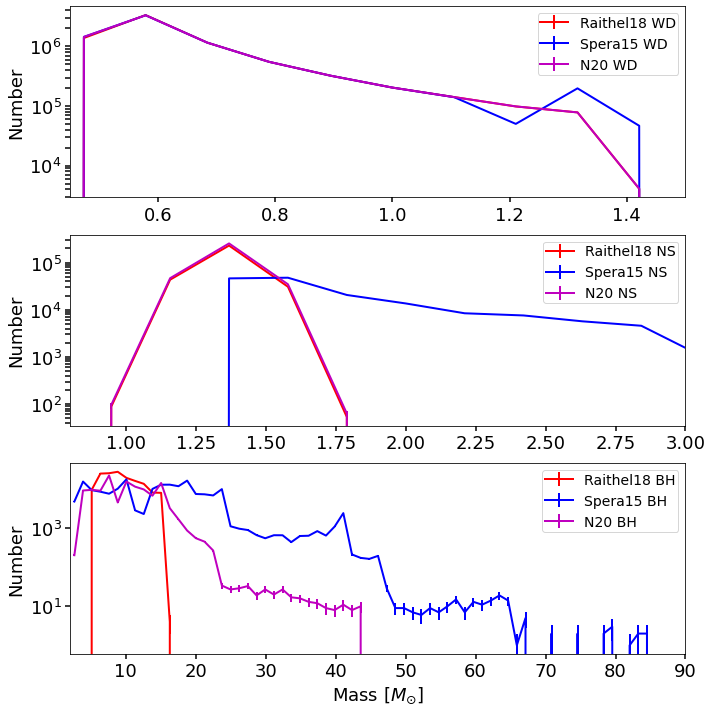

The average Raithel18 WD mass is 0.65
The average Raithel18 NS mass is 1.36
The average Raithel18 BH mass is 9.32
The average Spera15 WD mass is 0.66
The average Spera15 NS mass is 1.75
The average Spera15 BH mass is 14.74
The average N20 WD mass is 0.64
The average N20 NS mass is 1.36
The average N20 BH mass is 9.99


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from astropy.table import Table
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 14

#get the .dat files I made of the compact objects from 611 (see code below)
R = Table.read('/u/samrose/scratch/metal_ifmr_runs/R_611_CO.dat', format='ascii')
S = Table.read('/u/samrose/scratch/metal_ifmr_runs/S_611_CO.dat', format='ascii')
N = Table.read('/u/samrose/scratch/metal_ifmr_runs/N_611_CO.dat', format='ascii')

R_WD_idx = np.where(R['rem_id'] == 101)
S_WD_idx = np.where(S['rem_id'] == 101)
N_WD_idx = np.where(N['rem_id'] == 101)

R_NS_idx = np.where(R['rem_id'] == 102)
S_NS_idx = np.where(S['rem_id'] == 102)
N_NS_idx = np.where(N['rem_id'] == 102)

R_BH_idx = np.where(R['rem_id'] == 103)
S_BH_idx = np.where(S['rem_id'] == 103)
N_BH_idx = np.where(N['rem_id'] == 103)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10,10))

WD_mass_bins = np.linspace(0, 2,20)
NS_mass_bins = np.linspace(0, 4, 20)
BH_mass_bins = np.linspace(2, 100, 80)

#WDs
n_R_WD, k = np.histogram(R['mass'][R_WD_idx], WD_mass_bins)
n_S_WD, k = np.histogram(S['mass'][S_WD_idx], WD_mass_bins)
n_N_WD, k = np.histogram(N['mass'][N_WD_idx], WD_mass_bins)

WD_bin_cent = np.zeros(len(n_S_WD))

for i in range(0, len(n_S_WD)):
    WD_bin_cent[i] = 0.5*(WD_mass_bins[i]+WD_mass_bins[i+1])
    
ax1.errorbar(WD_bin_cent, n_R_WD, yerr=np.sqrt(n_R_WD), fmt='r-', label='Raithel18 WD', linewidth=2)
ax1.errorbar(WD_bin_cent, n_S_WD, yerr=np.sqrt(n_S_WD), fmt='b-', label='Spera15 WD', linewidth=2)
ax1.errorbar(WD_bin_cent, n_N_WD, yerr=np.sqrt(n_N_WD), fmt='m-', label='N20 WD', linewidth=2)

#NSs
n_R_NS, k = np.histogram(R['mass'][R_NS_idx], NS_mass_bins)
n_S_NS, k = np.histogram(S['mass'][S_NS_idx], NS_mass_bins)
n_N_NS, k = np.histogram(N['mass'][N_NS_idx], NS_mass_bins)

NS_bin_cent = np.zeros(len(n_S_NS))

for i in range(0, len(n_S_NS)):
    NS_bin_cent[i] = 0.5*(NS_mass_bins[i]+NS_mass_bins[i+1])
    
ax2.errorbar(NS_bin_cent, n_R_NS, yerr=np.sqrt(n_R_NS), fmt='r-', label='Raithel18 NS', linewidth=2)
ax2.errorbar(NS_bin_cent, n_S_NS, yerr=np.sqrt(n_S_NS), fmt='b-', label='Spera15 NS', linewidth=2)
ax2.errorbar(NS_bin_cent, n_N_NS, yerr=np.sqrt(n_N_NS), fmt='m-', label='N20 NS', linewidth=2)

#BHs
n_R_BH, k = np.histogram(R['mass'][R_BH_idx], BH_mass_bins)
n_S_BH, k = np.histogram(S['mass'][S_BH_idx], BH_mass_bins)
n_N_BH, k = np.histogram(N['mass'][N_BH_idx], BH_mass_bins)

BH_bin_cent = np.zeros(len(n_S_BH))

for i in range(0, len(n_S_BH)):
    BH_bin_cent[i] = 0.5*(BH_mass_bins[i]+BH_mass_bins[i+1])
    
ax3.errorbar(BH_bin_cent, n_R_BH, yerr=np.sqrt(n_R_BH), fmt='r-', label='Raithel18 BH', linewidth=2)
ax3.errorbar(BH_bin_cent, n_S_BH, yerr=np.sqrt(n_S_BH), fmt='b-', label='Spera15 BH', linewidth=2)
ax3.errorbar(BH_bin_cent, n_N_BH, yerr=np.sqrt(n_N_BH), fmt='m-', label='N20 BH', linewidth=2)


ax1.tick_params(which='both', width=1.5, length=5)
ax1.set(yscale='log', ylabel='Number', xlim=(0.45, 1.5))
ax1.legend()
ax2.tick_params(which='both', width=1.5, length=5)
ax2.set(yscale='log', ylabel='Number', xlim=(0.8, 3))
ax2.legend()
ax3.tick_params(which='both', width=1.5, length=5)
ax3.set(yscale='log', xlabel='Mass [$M_{\odot}$]', ylabel='Number', xlim=(2, 90))
ax3.legend()
plt.subplots_adjust(hspace=0.005)
plt.tight_layout()
plt.savefig('COs_611.png')
plt.show()

R_WD_avg = np.average(R['mass'][R_WD_idx])
R_NS_avg = np.average(R['mass'][R_NS_idx])
R_BH_avg = np.average(R['mass'][R_BH_idx])
print('The average Raithel18 WD mass is {:.2f}'.format(R_WD_avg))
print('The average Raithel18 NS mass is {:.2f}'.format(R_NS_avg))
print('The average Raithel18 BH mass is {:.2f}'.format(R_BH_avg))

S_WD_avg = np.average(S['mass'][S_WD_idx])
S_NS_avg = np.average(S['mass'][S_NS_idx])
S_BH_avg = np.average(S['mass'][S_BH_idx])
print('The average Spera15 WD mass is {:.2f}'.format(S_WD_avg))
print('The average Spera15 NS mass is {:.2f}'.format(S_NS_avg))
print('The average Spera15 BH mass is {:.2f}'.format(S_BH_avg))

N_WD_avg = np.average(N['mass'][N_WD_idx])
N_NS_avg = np.average(N['mass'][N_NS_idx])
N_BH_avg = np.average(N['mass'][N_BH_idx])
print('The average N20 WD mass is {:.2f}'.format(N_WD_avg))
print('The average N20 NS mass is {:.2f}'.format(N_NS_avg))
print('The average N20 BH mass is {:.2f}'.format(N_BH_avg))

import numpy as np
import h5py
from astropy.table import Table

#identify the h5 files for each IFMR for field 611
R = '/u/samrose/scratch/metal_ifmr_runs/OGLE611ub_v3/my_Raithel611/OGLE611ub_v3_my_Raithel.h5'
N = '/u/samrose/scratch/metal_ifmr_runs/OGLE611ub_v3/OGLE611ub_v3_N20.h5'
S = '/u/samrose/scratch/metal_ifmr_runs/OGLE611ub_v3/OGLE611ub_v3_Spera.h5'

#gonna make astropy tables with just the mass and phase of the compact objects
hf = h5py.File(R, 'r')
keys = list(hf.keys())
R_mass = np.array([]) #solar masses, index 2 in each data set 'mass'
R_rem_ID = np.array([]) # 0=star 101= WD 102=NS 103=BH, index 1 in each data set 'rem_id'
for i, key in enumerate(keys):
    if i % 100 == 0:
        print('%i/%i' % (i, len(keys)))
    if key == keys[len(keys)-1]:
        print('done')
        continue
    if key == keys[len(keys)-2]:
        continue
    if len(hf[key]['mass']) == 0:
        continue
    R_mass = np.append(R_mass, hf[key]['mass'])
    R_rem_ID = np.append(R_rem_ID, hf[key]['rem_id'])
    
hf.close()
R_compact_idx = np.where((R_rem_ID == 101) |
                        (R_rem_ID == 102) |
                        (R_rem_ID == 103))
R_611_CO = Table()
R_611_CO['mass'] = R_mass[R_compact_idx]
R_611_CO['rem_id'] = R_rem_ID[R_compact_idx]
R_611_CO.write('/u/samrose/scratch/metal_ifmr_runs/R_611_CO.dat', format='ascii', overwrite=False)
del R_mass, R_rem_ID, R_611_CO

#gonna make astropy tables with just the mass and phase of the compact objects
hf = h5py.File(N, 'r')
keys = list(hf.keys())
N_mass = np.array([]) #solar masses, index 2 in each data set 'mass'
N_rem_ID = np.array([]) # 0=star 101= WD 102=NS 103=BH, index 1 in each data set 'rem_id'
for i, key in enumerate(keys):
    if i % 100 == 0:
        print('%i/%i' % (i, len(keys)))
    if key == keys[len(keys)-1]:
        print('done')
        continue
    if key == keys[len(keys)-2]:
        continue
    if len(hf[key]['mass']) == 0:
        continue
    N_mass = np.append(N_mass, hf[key]['mass'])
    N_rem_ID = np.append(N_rem_ID, hf[key]['rem_id'])
    
hf.close()
N_compact_idx = np.where((N_rem_ID == 101) |
                        (N_rem_ID == 102) |
                        (N_rem_ID == 103))
N_611_CO = Table()
N_611_CO['mass'] = N_mass[N_compact_idx]
N_611_CO['rem_id'] = N_rem_ID[N_compact_idx]
N_611_CO.write('/u/samrose/scratch/metal_ifmr_runs/N_611_CO.dat', format='ascii', overwrite=False)
del N_mass, N_rem_ID, N_611_CO

#gonna make astropy tables with just the mass and phase of the compact objects
hf = h5py.File(S, 'r')
keys = list(hf.keys())
S_mass = np.array([]) #solar masses, index 2 in each data set 'mass'
S_rem_ID = np.array([]) # 0=star 101= WD 102=NS 103=BH, index 1 in each data set 'rem_id'
for i, key in enumerate(keys):
    if i % 100 == 0:
        print('%i/%i' % (i, len(keys)))
    if key == keys[len(keys)-1]:
        print('done')
        continue
    if key == keys[len(keys)-2]:
        continue
    if len(hf[key]['mass']) == 0:
        continue
    S_mass = np.append(S_mass, hf[key]['mass'])
    S_rem_ID = np.append(S_rem_ID, hf[key]['rem_id'])
    
hf.close()
S_compact_idx = np.where((S_rem_ID == 101) |
                        (S_rem_ID == 102) |
                        (S_rem_ID == 103))
S_611_CO = Table()
S_611_CO['mass'] = S_mass[S_compact_idx]
S_611_CO['rem_id'] = S_rem_ID[S_compact_idx]
S_611_CO.write('/u/samrose/scratch/metal_ifmr_runs/S_611_CO.dat', format='ascii', overwrite=False)
del S_mass, S_rem_ID, S_611_CO